In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
import json
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [2]:
# import dataset
dfPhiladelphia = pd.read_csv("data/exports/dfPhiladelphia.csv.zip")
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589213 entries, 0 to 589212
Data columns (total 34 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   start_date                              589213 non-null  object 
 1   start_month                             589213 non-null  int64  
 2   start_week                              589213 non-null  int64  
 3   start_day                               589213 non-null  int64  
 4   end_date                                589213 non-null  object 
 5   start_time_hourly                       589213 non-null  int64  
 6   end_time_hourly                         589213 non-null  int64  
 7   start_station_id                        589213 non-null  int64  
 8   end_station_id                          589213 non-null  int64  
 9   bike_id                                 589213 non-null  int64  
 10  start_latitude                          5892

In [3]:
# import dataset
dfPhiladelphia_with_0_trips = pd.read_csv("data/exports/dfPhiladelphiaIncluding0Trips.csv.zip")
dfPhiladelphia_with_0_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589410 entries, 0 to 589409
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   start_date                              589410 non-null  object 
 1   start_month                             589410 non-null  int64  
 2   start_week                              589410 non-null  int64  
 3   start_day                               589410 non-null  int64  
 4   start_time_hourly                       589410 non-null  int64  
 5   end_time_hourly                         589213 non-null  float64
 6   min_temp                                589410 non-null  float64
 7   max_temp                                589410 non-null  float64
 8   isPrecip                                589410 non-null  bool   
 9   dayOfWeek                               589410 non-null  object 
 10  isWeekend                               5894

In [4]:
x = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_date"] == "2019-12-31") & (dfPhiladelphia_with_0_trips["start_time_hourly"] == 4)]
x

,start_date,start_month,start_week,start_day,start_time_hourly,end_time_hourly,min_temp,max_temp,isPrecip,dayOfWeek,...,isRushhour,numOfRentedBikesHourly,numOfRentedBikesHourlyStationDependent,user_type,bike_type,start_station_id,end_station_id,start_station_name,end_station_name,tripduration_sec
588483,2019-12-31,12,1,31,4,NaN,5.0,5.0,False,Tuesday,...,False,0,0,None,None,0,0,None,None,0


Importing the weather data from task 1 to further examine it in relation with other demand patterns.

In [90]:
dfWeather = pd.read_csv("data/exports/dfWeather.csv.zip")
dfWeather.drop(dfWeather.tail(1).index,inplace=True)

# convert the 'Date' column to datetime format
dfWeather['date_time']= pd.to_datetime(dfWeather['date_time'])

dfWeather['month'] = dfWeather['date_time'].dt.round("H").dt.month
dfWeather['week'] = dfWeather['date_time'].dt.round("H").dt.week
dfWeather['date'] = dfWeather['date_time'].dt.round("H").dt.date

C:\Users\Jonas\AppData\Local\Temp\ipykernel_388\4270005039.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dfWeather['week'] = dfWeather['date_time'].dt.round("H").dt.week


# 2. Descriptive Analytics

In [6]:
palette = "Spectral"

## 2.1 Temporal Demand Patterns and Seasonality

In this section, we will:
- Demonstrate how fleet usage varies during a day, a week and the year. 
- What patterns do you observe? Explain.

### 2.1.1 Fleet Usage Variety During 2019 in Philadelphia - Yearly Abstraction

#### 2.1.1.1 Data Preparation

In [7]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

dates = ['2019/01/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/03/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/05/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/07/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/09/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/11/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

In [8]:
def create_df_average_max_temp(time):
    
    # dataframe for monthly average max temparatures
    if time == 'month':
        dfWeather_average_max_temp = dfWeather.groupby(['month'])['max_temp'].mean().reset_index()
    # dataframe for weekly average max temparatures
    elif time == 'week':
        dfWeather_average_max_temp = dfWeather.groupby(['week'])['max_temp'].mean().reset_index()
    # dataframe for daily average max temparatures
    elif time == 'date':
        dfWeather_average_max_temp = dfWeather.groupby(['date'])['max_temp'].mean().reset_index()
    else:
        return "False Statement. Please provide other input."
    
    return dfWeather_average_max_temp['max_temp']

Method to create averages for specific timeframe (monthly, weekly, daily). This method can later be used again.

In [9]:
def create_df_precip_rate(timeframe):
    
    dfWeather_precip_rate = pd.DataFrame(dfWeather)
    dfWeather_precip_rate["precip_sum"] = dfWeather_precip_rate["isPrecip"].map({True: 1., False: 0.})
    
    # get the accummulated value for precip_rate for each month
    dfWeather_precip_rate = dfWeather_precip_rate.groupby([timeframe])['precip_sum'].sum().reset_index()
   
    if timeframe == 'month':
        # add sum of days per month column
        hours_per_month_dict = dfWeather.groupby(['month'])['month'].count().to_dict()
        dfWeather_precip_rate['hours_per_month'] = dfWeather_precip_rate['month'].map(hours_per_month_dict)
        # get the monthly precip rate
        dfWeather_precip_rate['precip_rate'] = dfWeather_precip_rate['precip_sum']/dfWeather_precip_rate['hours_per_month'] 
    elif timeframe == 'week':
        # get the weekly precip rate
        hours_per_week = 7*24
        dfWeather_precip_rate['precip_rate'] = dfWeather_precip_rate['precip_sum']/hours_per_week
    elif timeframe == 'date':
        # get the precip rate
        hours_per_day = 24
        dfWeather_precip_rate['precip_rate'] = dfWeather_precip_rate['precip_sum']/hours_per_day
    else:
        return "False Statement. Please provide other input."
    
    return dfWeather_precip_rate['precip_rate']

Same reason here. We are creating unique dataframes for the precip rate per month, week, or day whatever is needed. The rate is calclated by grouping all entries for ever hiur and then dividing it by the respective sum of hours per month, week or day.

In [84]:
def create_plot_for_visualization(plot_type, df, timeframe, y_value, max_temp, precip_rate, title, y_axis_left, y_axis_right):
    
    fig, ax1 = plt.subplots(figsize=(12,6))
    
    # checking which kind of plot should be shown
    if plot_type == "barplot":
        sns.barplot(data = df, x='start_' + timeframe, y = y_value, alpha=0.5, ax=ax1, color='royalblue')
    elif plot_type == "lineplot":
        sns.lineplot(data = df, x='start_' + timeframe, y = y_value, sort = False, ax=ax1, color='royalblue')
    else:
        return "False input. Define right plot type."
    
    # check whether visualization of precip rate requested
    if max_temp:
        # lineplot for weather data - average max temp per month
        ax2 = ax1.twinx()
        sns.lineplot(data = create_df_average_max_temp(timeframe), sort = False, ax=ax2, color='darkorange')
    
    # check whether visualization of precip rate requested
    if precip_rate:
        # lineplot for weather data - precip rate per month 
        ax3 = ax1.twinx()
        sns.lineplot(data = create_df_precip_rate(timeframe), sort = False, ax=ax3, color='forestgreen')
        ax3.spines['right'].set_position(('axes',1.05))
        
    # check which style for the labels of the x axis is requested
    if timeframe == 'month':
        # set ticks on x axis to named months
        plt.xticks(range(len(months)), months, fontsize=14, rotation=0)
    elif timeframe == 'date':
        # set ticks on x axis to certain dates
        plt.xticks(range(len(dates)), dates, fontsize=14, rotation=0)
    else:
        plt.xticks(fontsize=14, rotation=0)
    
    # styling of the plot
    # set title & axis labels
    ax1.set_title(title, fontsize=18)
    ax1.set_xlabel(timeframe.capitalize(), fontsize=14, style='oblique')
    ax1.set_ylabel(y_axis_left, color="royalblue", fontsize=14, style='oblique')
    ax2.set_ylabel(y_axis_right,color="darkorange", fontsize=14, style='oblique')
    if precip_rate:
        ax3.set_ylabel("Precip Rate for each " + timeframe,color="forestgreen", fontsize=14, style='oblique')

    # set color of y axis 
    ax1.tick_params(axis='y',colors="royalblue", labelsize=14)
    ax2.tick_params(axis='y',colors="darkorange", labelsize=14)
    if precip_rate:
        ax3.tick_params(axis='y',colors="forestgreen", labelsize=14)
        ax2.spines['right'].set_color("darkorange")
        ax3.spines['right'].set_color("forestgreen")
        ax3.spines['left'].set_color("royalblue")
    elif not precip_rate:
        ax2.spines['right'].set_color("darkorange")
        ax2.spines['left'].set_color("royalblue")

    fig = plt.gcf()
    fig.set_size_inches(16, 9)
    plt.show()

Another method to plot the data and better visualize it

#### 2.1.1.2 Visualizing the Fleet Usage of 2019 by each month

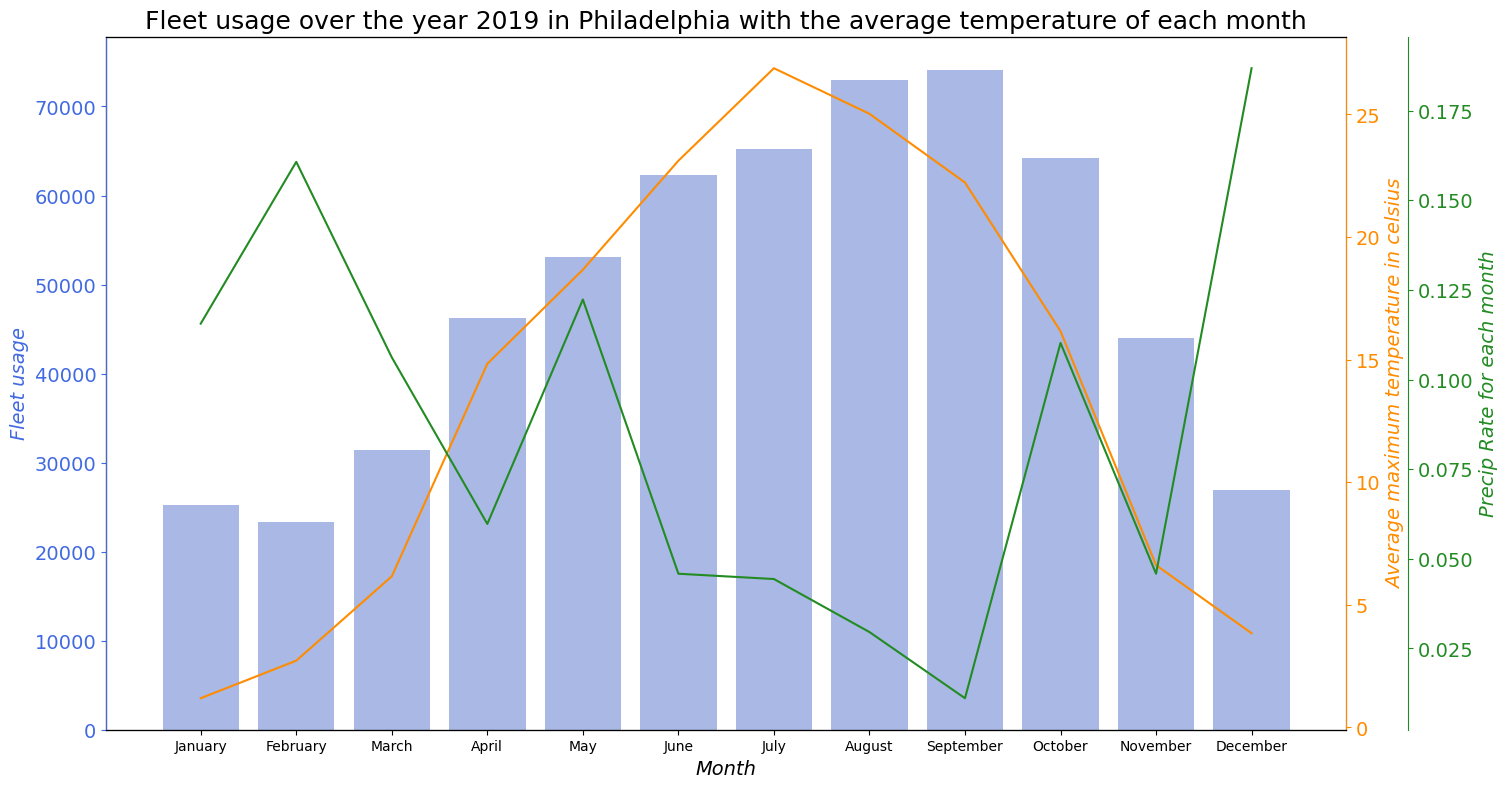

In [85]:
create_plot_for_visualization("barplot", dfPhiladelphia, 'month', 'numOfRentedBikesMonthly', True, True, 
                             "Fleet usage over the year 2019 in Philadelphia with the average temperature of each month",
                             "Fleet usage", "Average maximum temperature in celsius")

Explanations and Patterns

### 2.1.2 Fleet Utilization During 2019 in Philadelphia - Yearly Abstraction

#### 2.1.2.1 Data Preparation

##### Information about INDEGO [Source](https://www.phila.gov/2019-05-02-indego-announces-expansion-of-its-electric-bike-fleet-new-stations/#:~:text=ABOUT%20INDEGO%0AThe%20City%20of%20Philadelphia%20launched%20Indego%20in%202015%20as%20the%20city%E2%80%99s%20newest%20form%20of%20public%20transportation%20with%2060%20stations%20and%20600%20bikes%20and%20expanded%20in%202018%20to%20over%20130%20stations%20and%201%2C400%20bikes.) 
The City of Philadelphia launched Indego in 2015 as the city’s newest form of public transportation with 60 stations 
and 600 bikes and **expanded in 2018** to over 130 stations and **1,400 bikes**.  [Source](https://www.phila.gov/2019-05-02-indego-announces-expansion-of-its-electric-bike-fleet-new-stations/#:~:text=ABOUT%20INDEGO%0AThe%20City%20of%20Philadelphia%20launched%20Indego%20in%202015%20as%20the%20city%E2%80%99s%20newest%20form%20of%20public%20transportation%20with%2060%20stations%20and%20600%20bikes%20and%20expanded%20in%202018%20to%20over%20130%20stations%20and%201%2C400%20bikes.)<br>
In their annual Report from 2019, INDEGO states that their **system scope** include **130 stations**, **250 electric bikes** and **1.500 classic bikes**. Accordingly the **bike fleet of INDEGO** include **1.750 bikes** (regardless which kind). This report is based on **data from April 2019 to April 2020**. [Source](https://www.rideindego.com/wp-content/uploads/2020/12/Indego-2019-ANNUAL-REPORT.pdf)

In [64]:
#dataframe preparation for utilization rate of fleet
dfIndegoBikeFleet =  pd.DataFrame(dfPhiladelphia, columns=['bike_id'])

dfIndegoBikeFleet.drop_duplicates(inplace=True)

# store sum of unique bike ids in variable
counter_bike_fleet = dfIndegoBikeFleet['bike_id'].count()
print("There are", counter_bike_fleet, "unique bike IDs in the original INDEGO dataset from 2019.")
print("INDEGO's bike fleet in 2019:", counter_bike_fleet, "bikes")

There are 1674 unique bike IDs in the original INDEGO dataset from 2019.
INDEGO's bike fleet in 2019: 1674 bikes


In the following calculations of the fleet utilization we are going to use the value of **1674 bikes** as reference for INDEGO's bike fleet. This assumption makes sense since our calculated value is between the researched values of 1400 bicycles in 2018 & 1750 bicycles by April 2020 and accurately reflects the time frame of 2019.

In [65]:
def calculate_df_utilization_rate(time):
    dfUtilization_rate =  pd.DataFrame(dfPhiladelphia, columns=[time, 'bike_id'])
    dfUtilization_rate.drop_duplicates(inplace=True)
    if time == 'start_month':
        dfUtilization_rate = dfUtilization_rate.groupby(['start_month'])['bike_id'].count().reset_index()
    elif time == 'start_week':
        dfUtilization_rate = dfUtilization_rate.groupby(['start_week'])['bike_id'].count().reset_index()
    elif time == 'start_date':
        dfUtilization_rate = dfUtilization_rate.groupby(['start_date'])['bike_id'].count().reset_index()
    else:
        return "False Statement. Please provide other input."
    
    dfUtilization_rate.rename(columns={"bike_id": "counter_bikes"}, inplace = True)
    dfUtilization_rate['util_rate'] = dfUtilization_rate['counter_bikes'] / counter_bike_fleet
    
    return dfUtilization_rate

Explain how the utilization rate is calculated

#### 2.1.2.2 Visualization of Fleet Utilization Over 2019 for Each Month

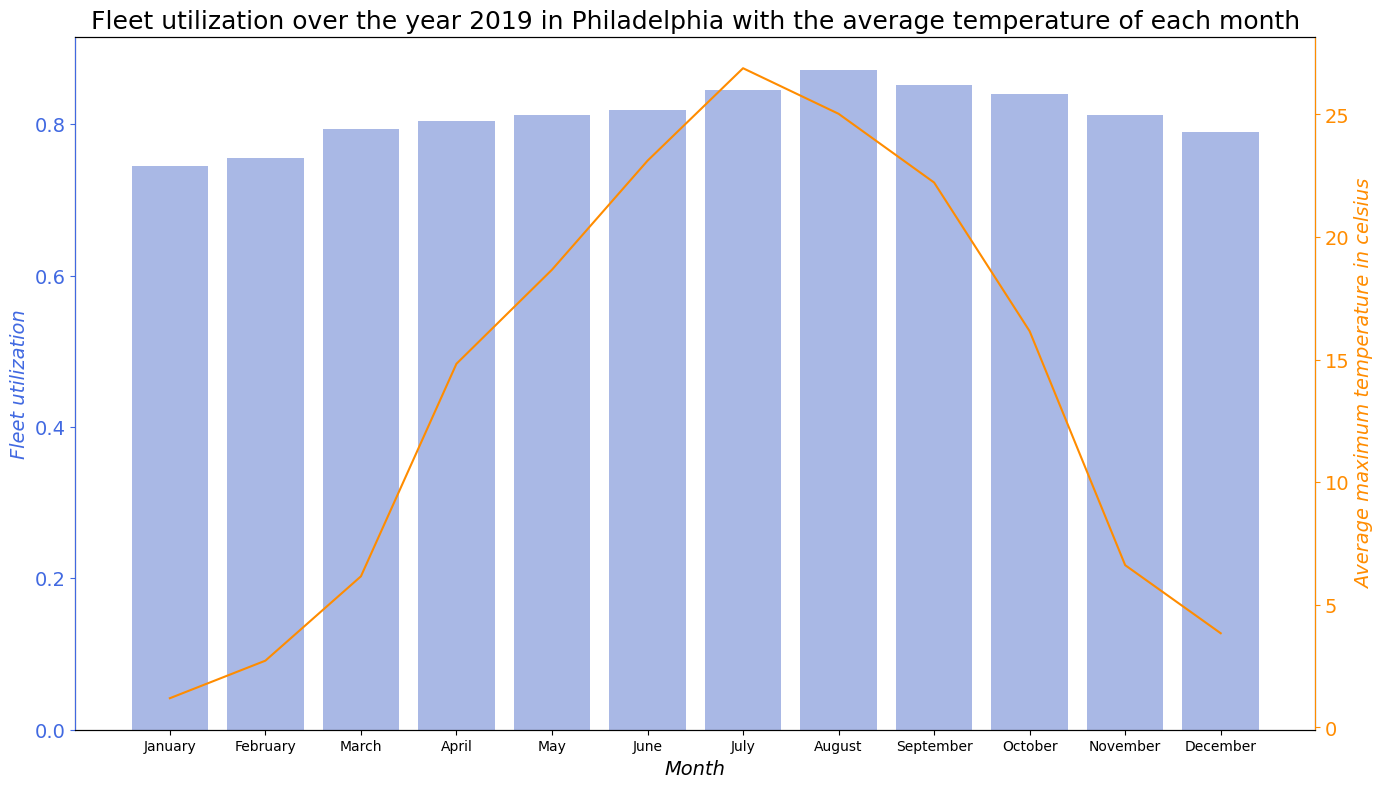

In [66]:
create_plot_for_visualization("barplot", calculate_df_utilization_rate('start_month'), 'month', 'util_rate', True, False, 
                             "Fleet utilization over the year 2019 in Philadelphia with the average temperature of each month",
                             "Fleet utilization", "Average maximum temperature in celsius")

Explanations

### 2.1.2.1 Fleet Usage Variety During 2019 in Philadelphia - Weekly Abstraction

Thanks to our pre defined and wirtten methods, we do nnot need to prepare the data again. We can directly starrt with plotting the results.

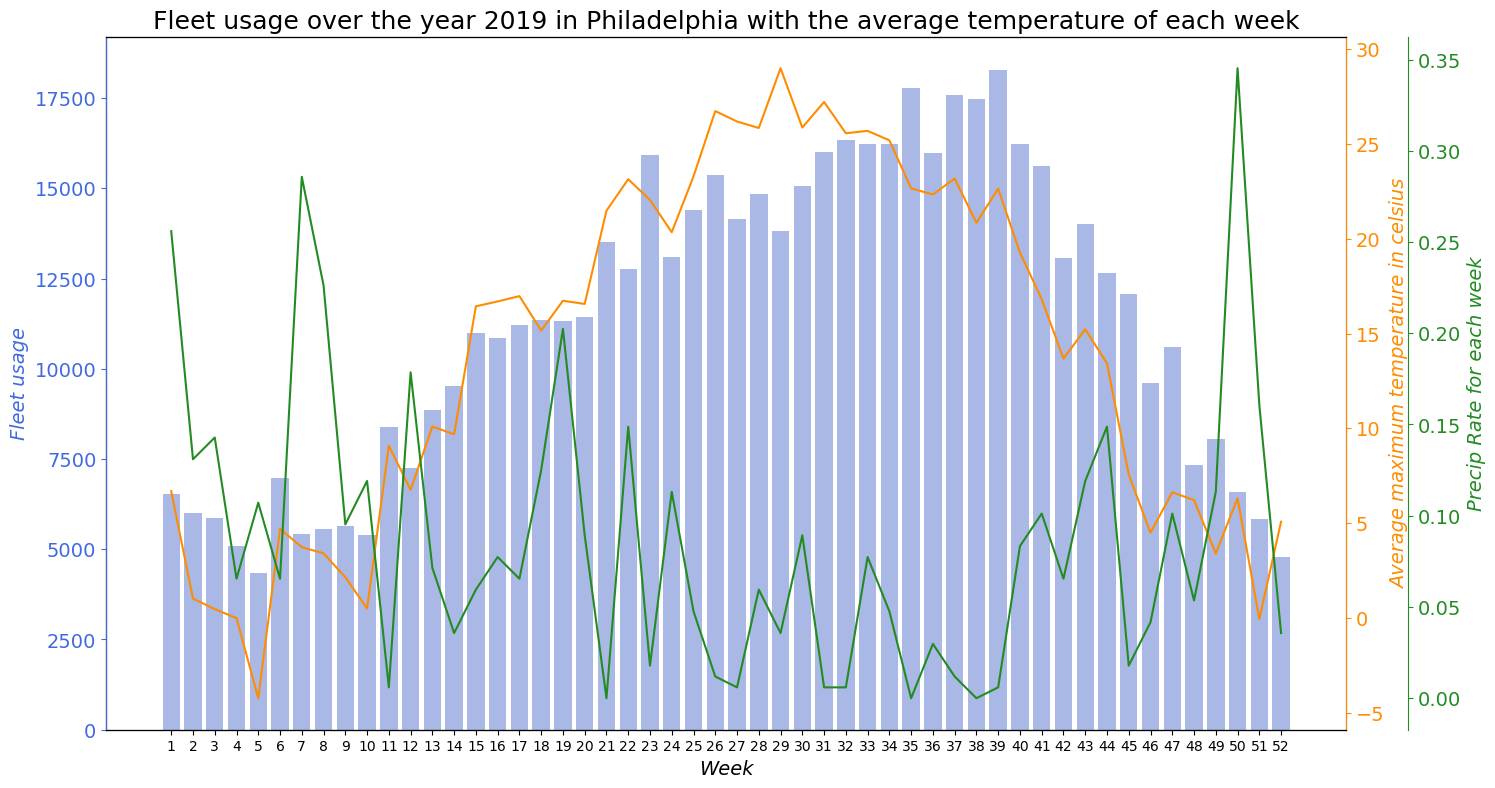

In [67]:
create_plot_for_visualization("barplot", dfPhiladelphia, 'week', 'numOfRentedBikesWeekly', True, True, 
                             "Fleet usage over the year 2019 in Philadelphia with the average temperature of each week",
                             "Fleet usage", "Average maximum temperature in celsius")

Explanations

#### 2.1.2.2 Fleet Utilization During 2019 in Philadelphia - Weekly Abstraction

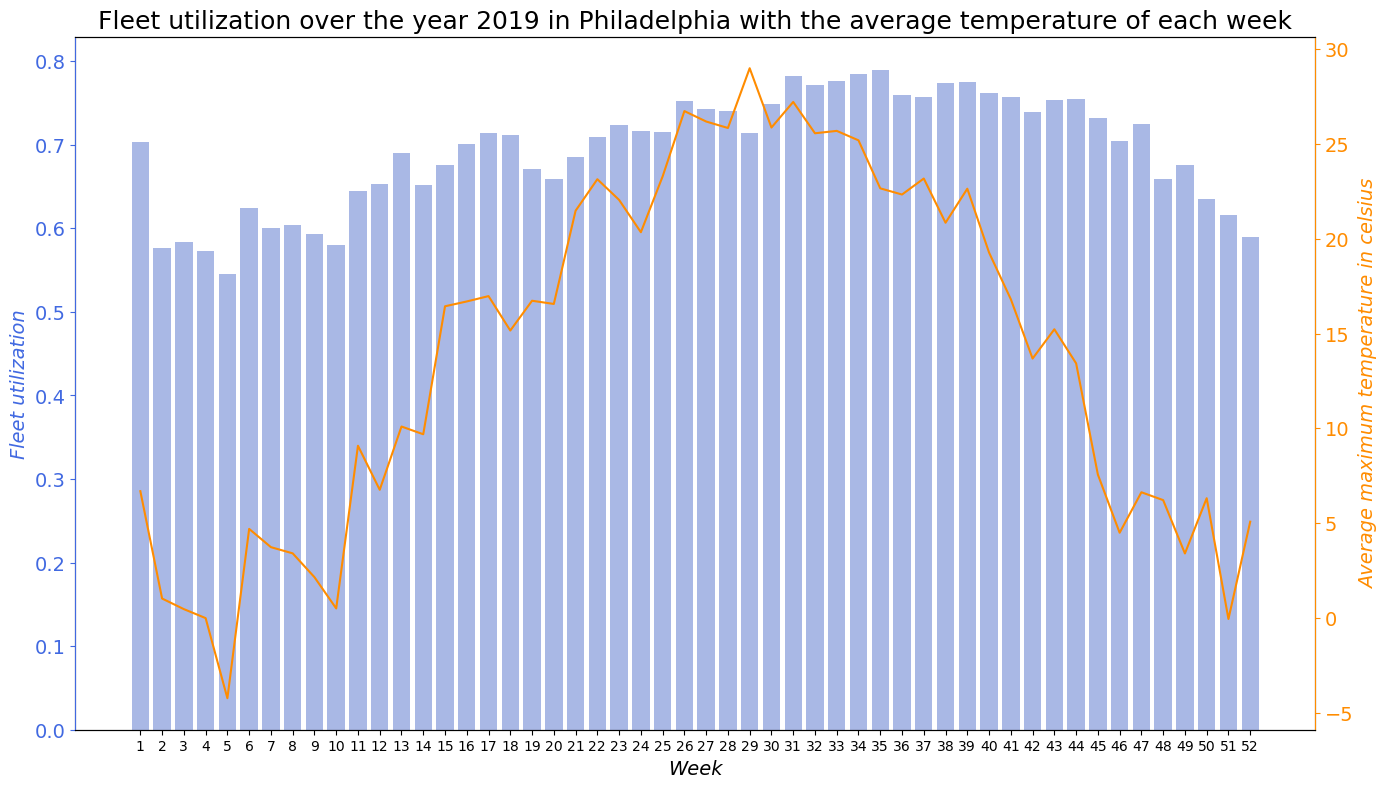

In [68]:
create_plot_for_visualization("barplot", calculate_df_utilization_rate('start_week'), 'week', 'util_rate', True, False, 
                             "Fleet utilization over the year 2019 in Philadelphia with the average temperature of each week",
                             "Fleet utilization", "Average maximum temperature in celsius")

#### 2.1.2.3  Further Investigations of Fleet Usage Demand Patterns on Weekly Basis

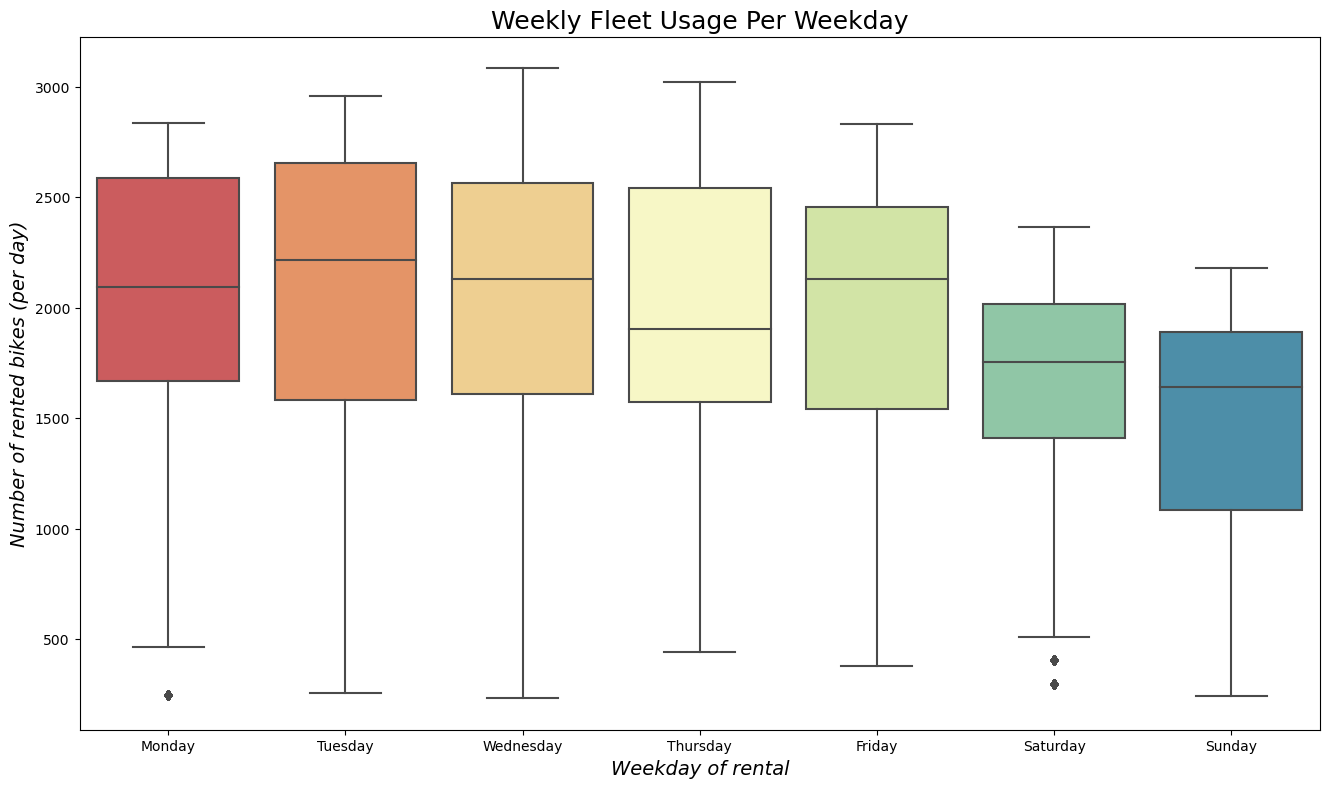

In [88]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.title("Weekly Fleet Usage Per Weekday", fontsize=18)
plt.xlabel("Weekday of rental", fontsize=14, style='oblique')
plt.ylabel("Number of rented bikes (per day)", fontsize=14, style='oblique')
plt.show()

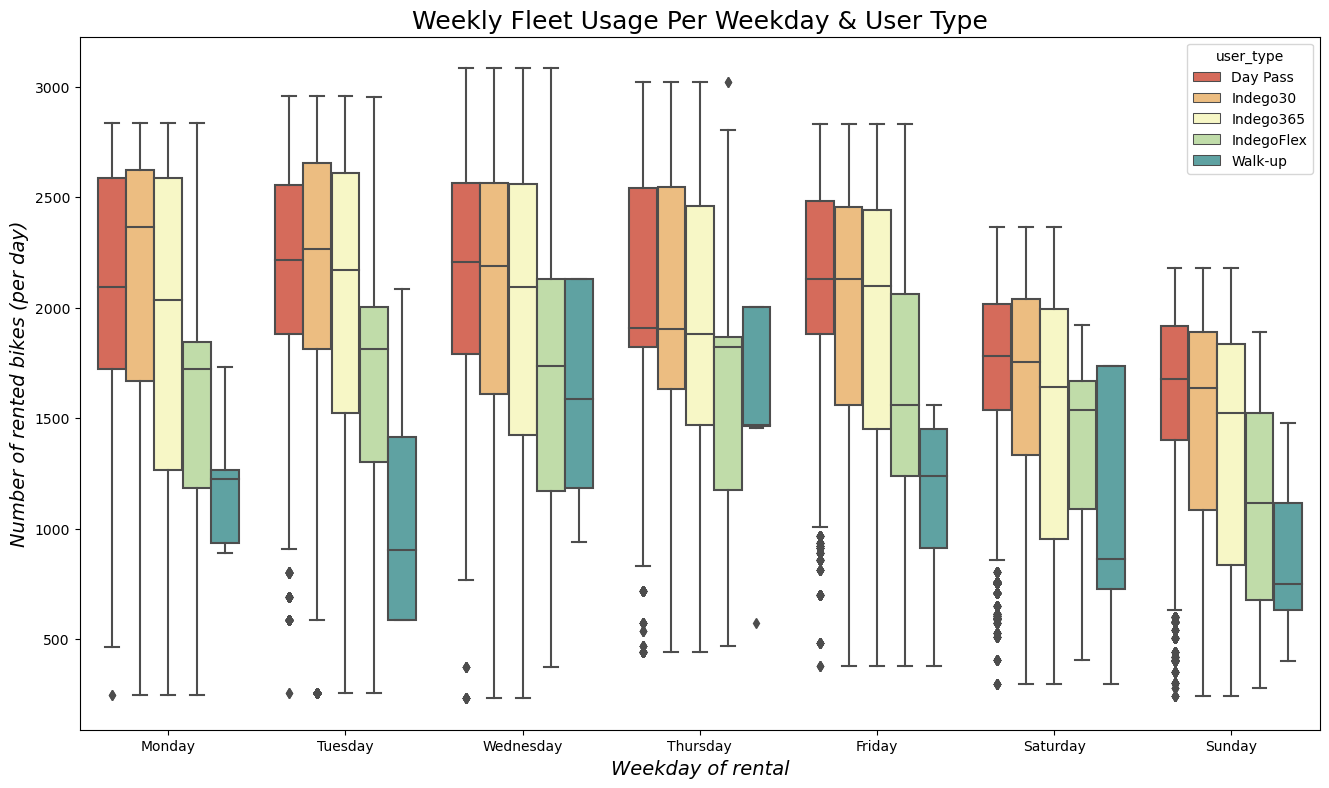

In [89]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,hue="user_type",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],hue_order=["Day Pass","Indego30","Indego365","IndegoFlex","Walk-up"])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.title("Weekly Fleet Usage Per Weekday & User Type", fontsize=18)
plt.xlabel("Weekday of rental", fontsize=14, style='oblique')
plt.ylabel("Number of rented bikes (per day)", fontsize=14, style='oblique')
plt.show()

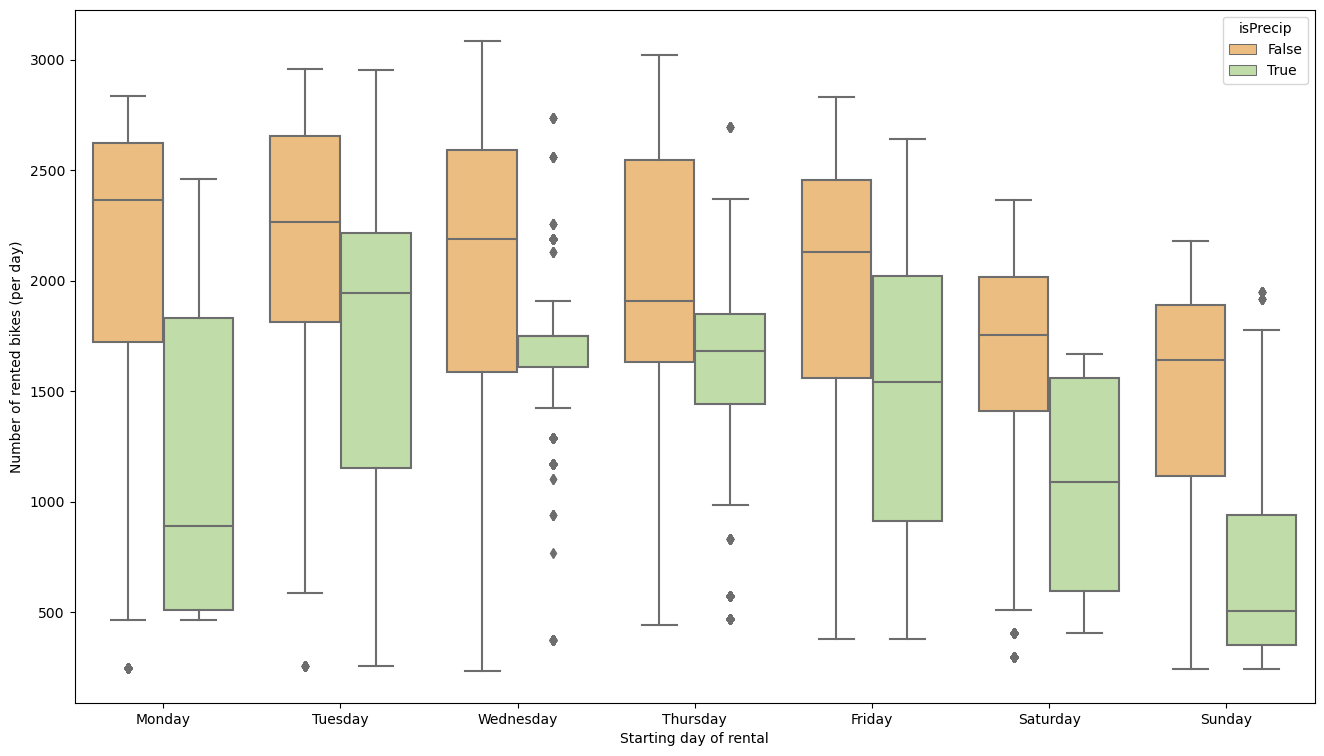

In [71]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,hue="isPrecip",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.title("Weekly Fleet Usage Per Weekday & Rainfall", fontsize=18)
plt.xlabel("Weekday of rental", fontsize=14, style='oblique')
plt.ylabel("Number of rented bikes (per day)", fontsize=14, style='oblique')
plt.show()

### 2.1.3.1 Fleet Usage Variety During 2019 in Philadelphia - Daily Abstraction

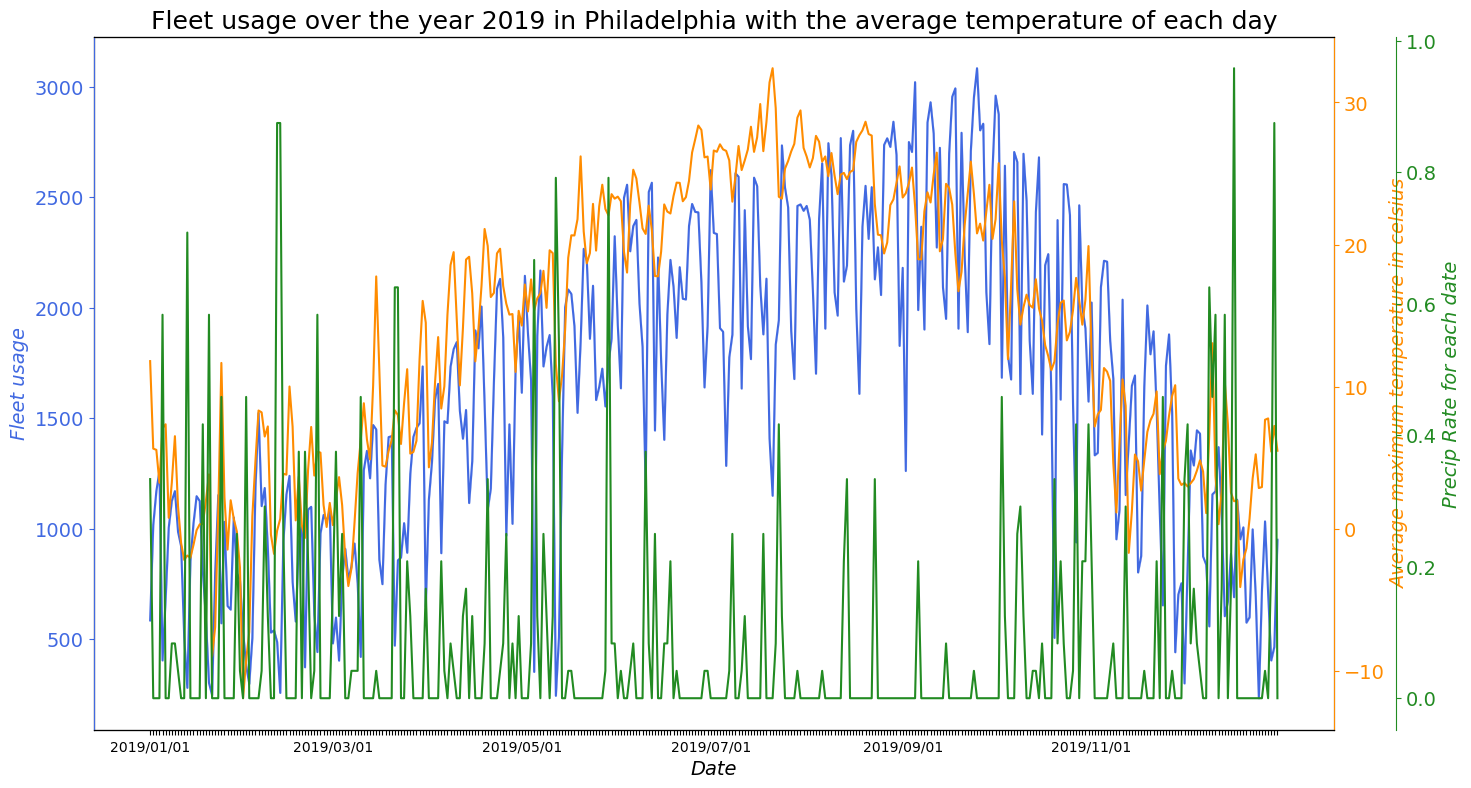

In [72]:
create_plot_for_visualization("lineplot", dfPhiladelphia, 'date', 'numOfRentedBikesDaily', True, True, 
                             "Fleet usage over the year 2019 in Philadelphia with the average temperature of each day",
                             "Fleet usage", "Average maximum temperature in celsius")

### 2.1.3.2 Fleet Utilization During 2019 in Philadelphia - Daily Abstraction

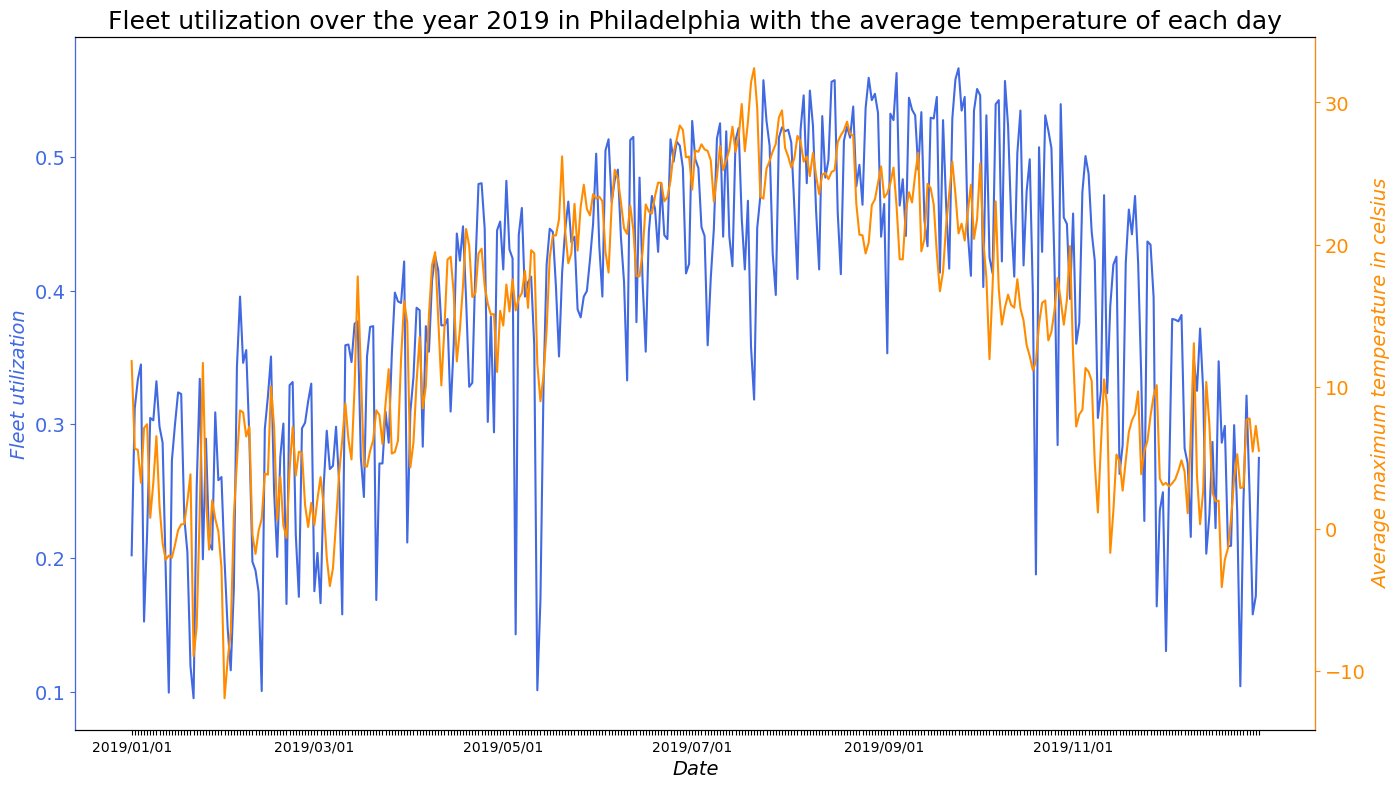

In [73]:
create_plot_for_visualization("lineplot", calculate_df_utilization_rate('start_date'), 'date', 'util_rate', True, False, 
                             "Fleet utilization over the year 2019 in Philadelphia with the average temperature of each day",
                             "Fleet utilization", "Average maximum temperature in celsius")

#### 2.1.3.3 Further Investigations of Fleet Usage Demand Patterns on Daily Basis

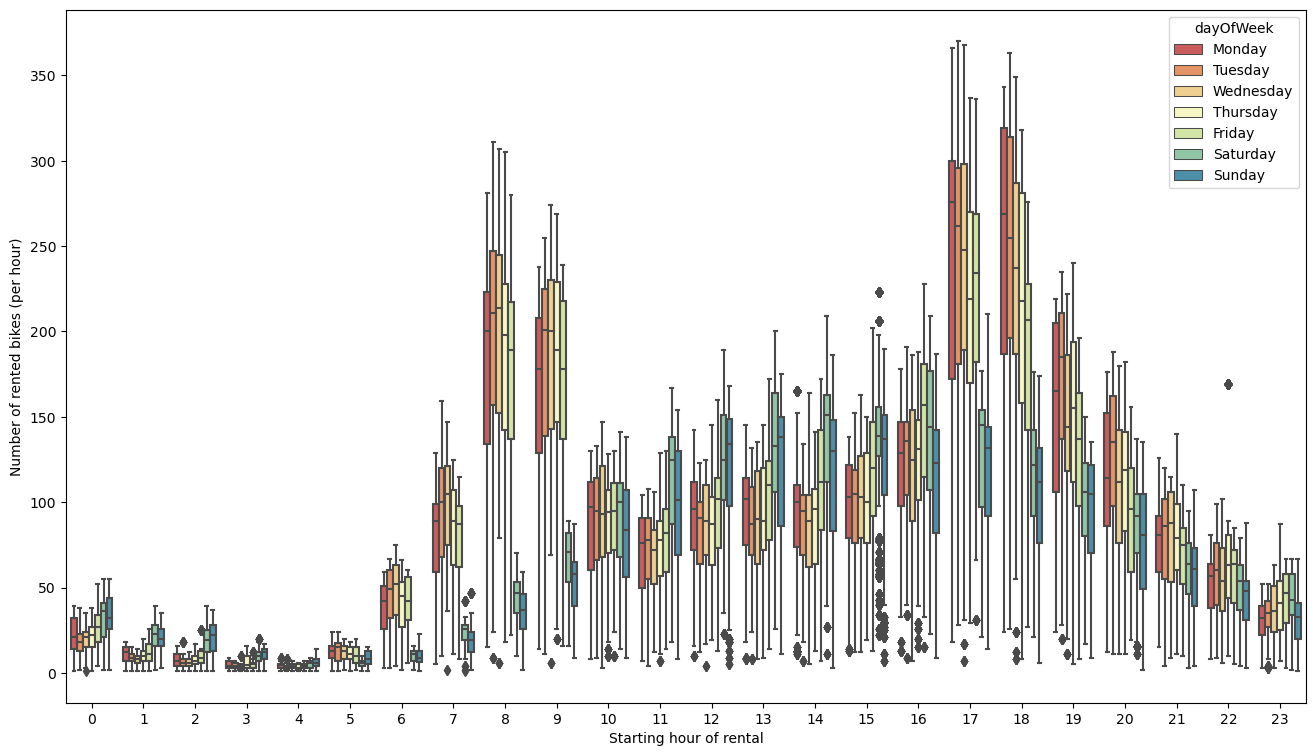

In [74]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette,hue="dayOfWeek",hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.xlabel("Starting hour of rental")
plt.ylabel("Number of rented bikes (per hour)")
plt.show()

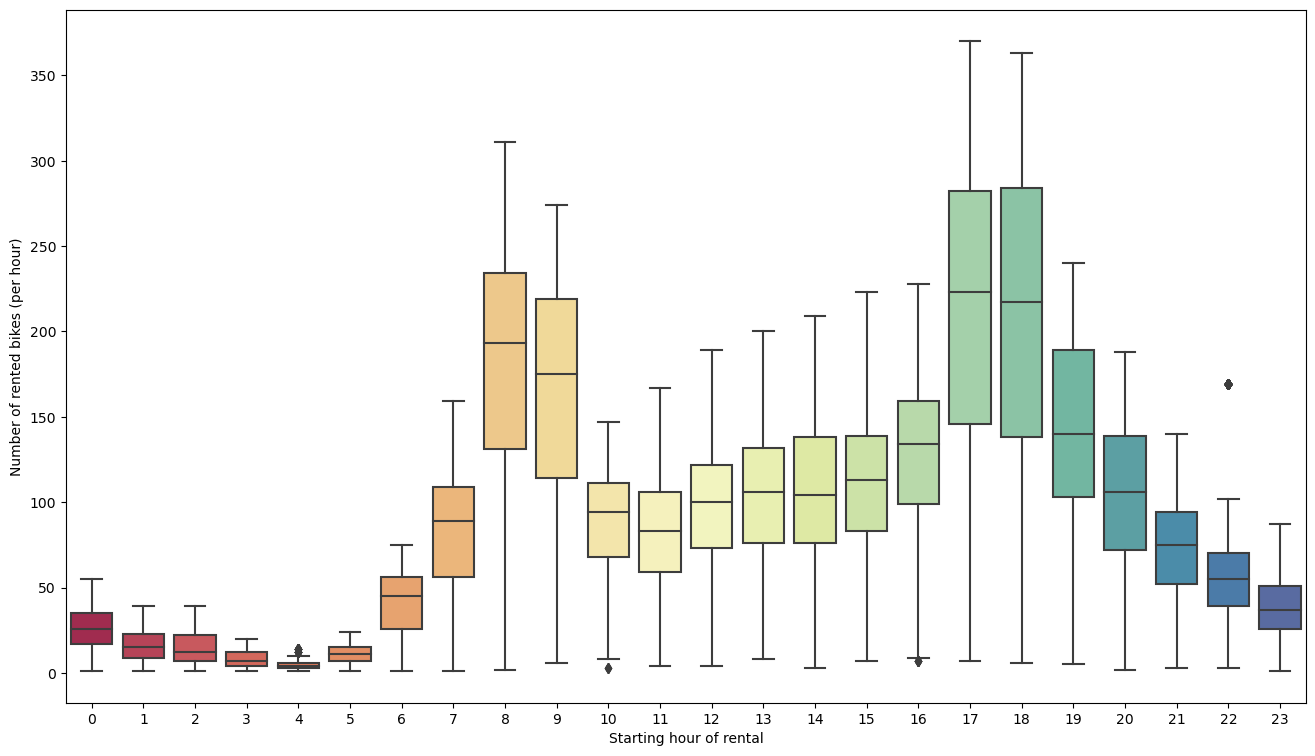

In [75]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.xlabel("Starting hour of rental")
plt.ylabel("Number of rented bikes (per hour)")
plt.show()

Tagsüber () wird mehr ausgeliehen, als Nachts ()
17-18 und 8-9 scheint was zu sein, vlt. Berufsverkehr? Wir werden uns das anscvhauen :D

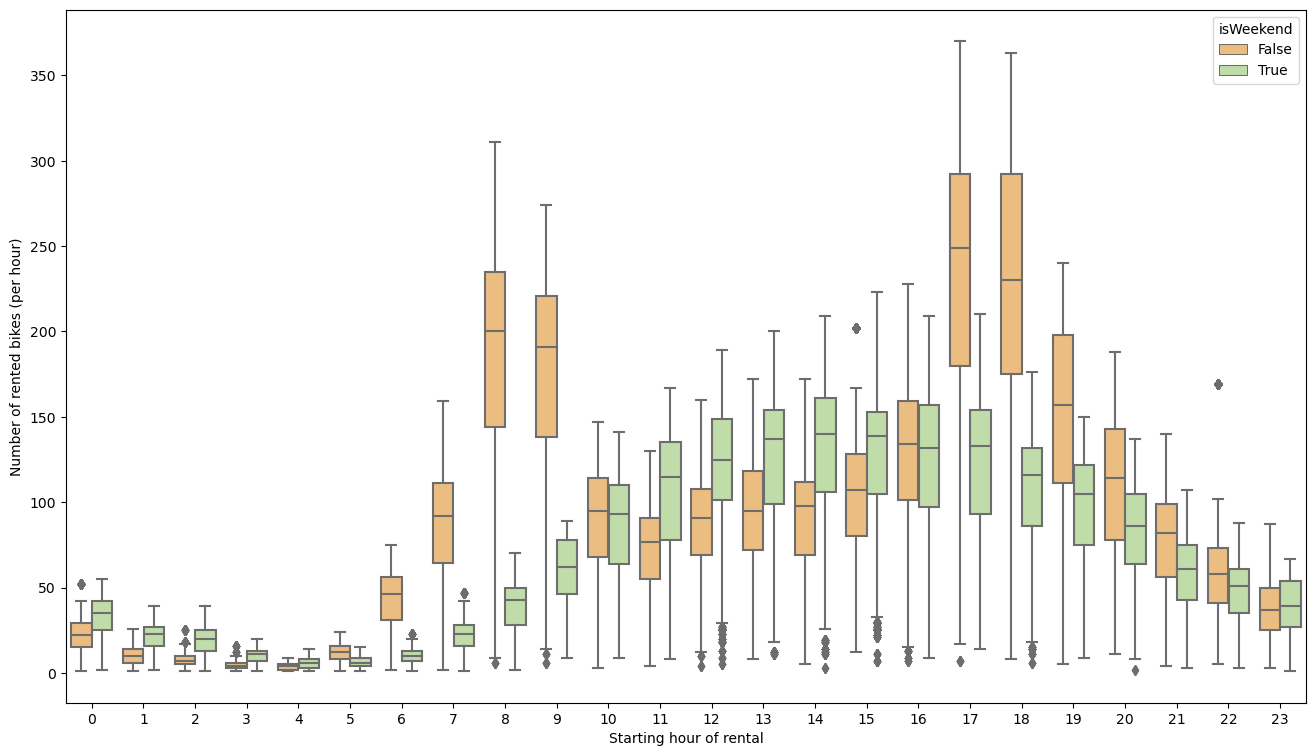

In [76]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isWeekend")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.xlabel("Starting hour of rental")
plt.ylabel("Number of rented bikes (per hour)")
plt.show()

In this graph we observe a rise in Fahradleih zum Berufsverkehr (isWeekend = False) zu den Zeiten 6,7,8,9,17,18
Am Wochenende (isWeekend = True) ist generell am Tag 11 bis 16/17 Uhr mehr verleih (Mehr Freizeit)
Partyfahrer Nachts am Wochende?? -> Next plot

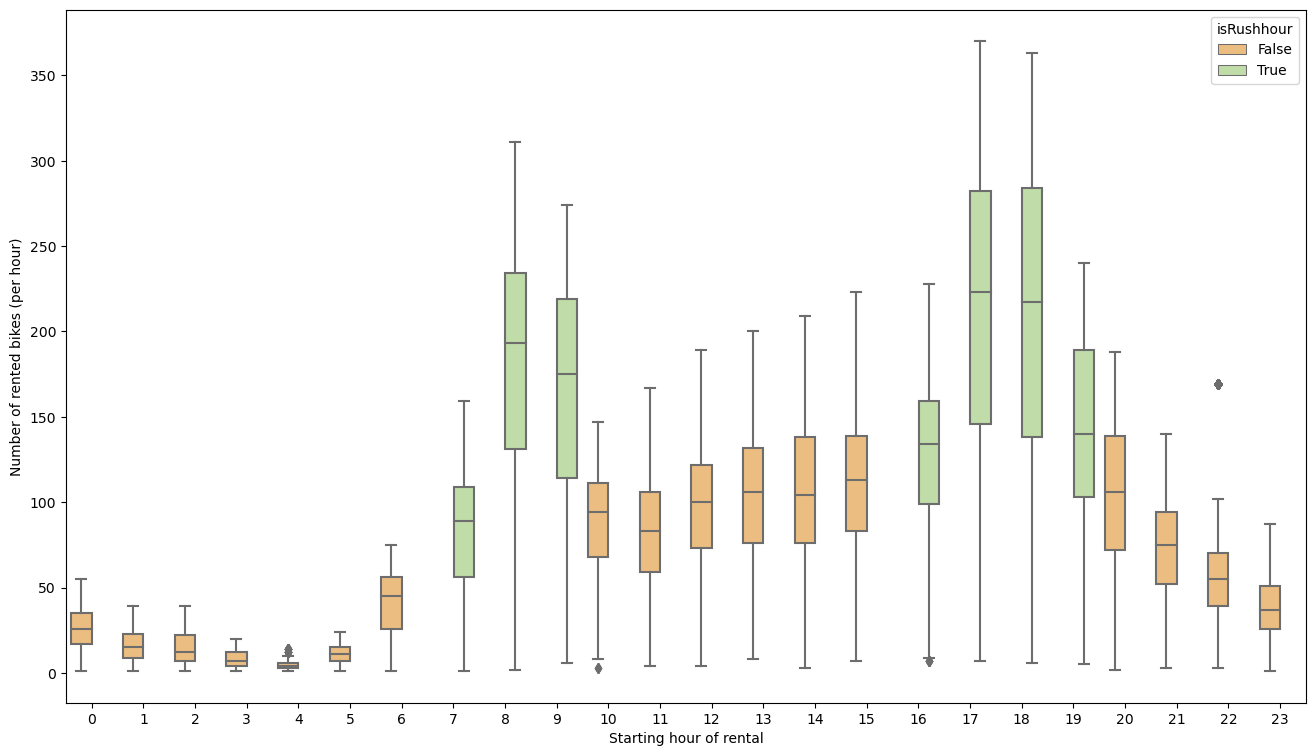

In [77]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isRushhour")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.xlabel("Starting hour of rental")
plt.ylabel("Number of rented bikes (per hour)")
plt.show()

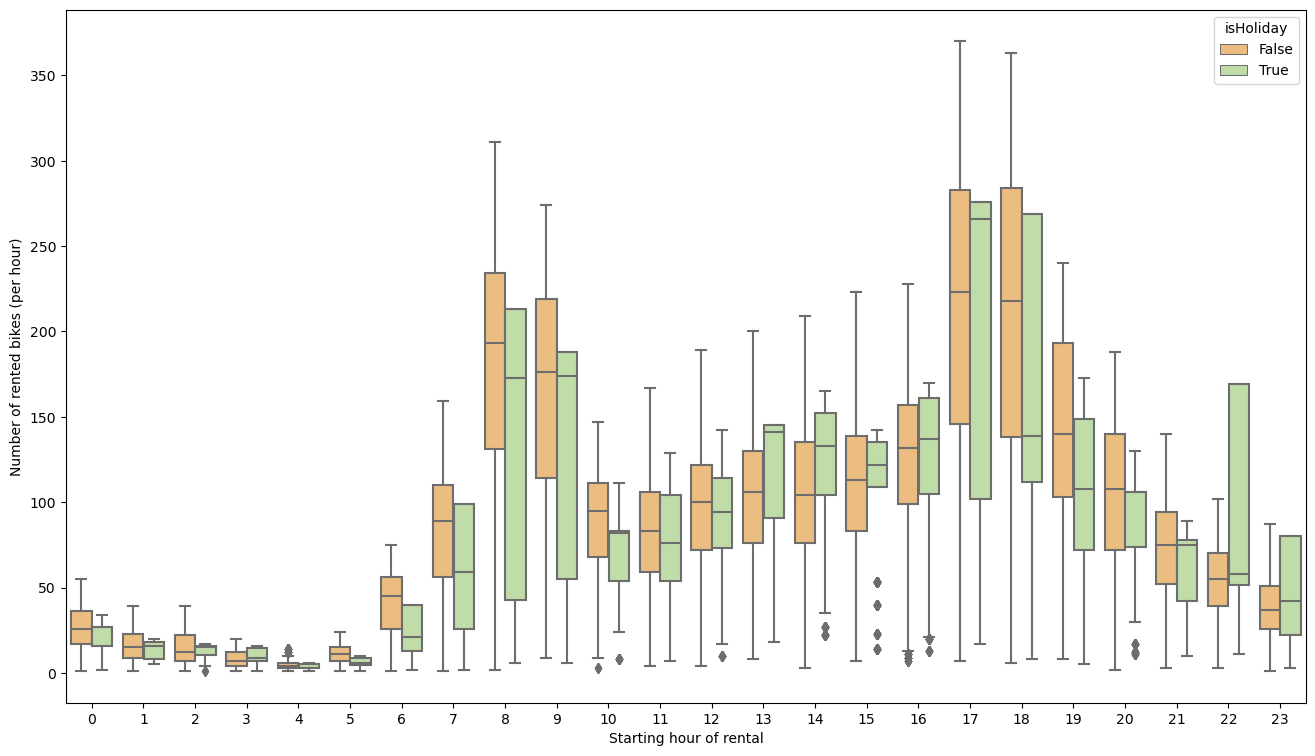

In [78]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isHoliday")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.xlabel("Starting hour of rental")
plt.ylabel("Number of rented bikes (per hour)")
plt.show()

ERKLÄRUNG AUCH FÜR Warum keine Unterschiede

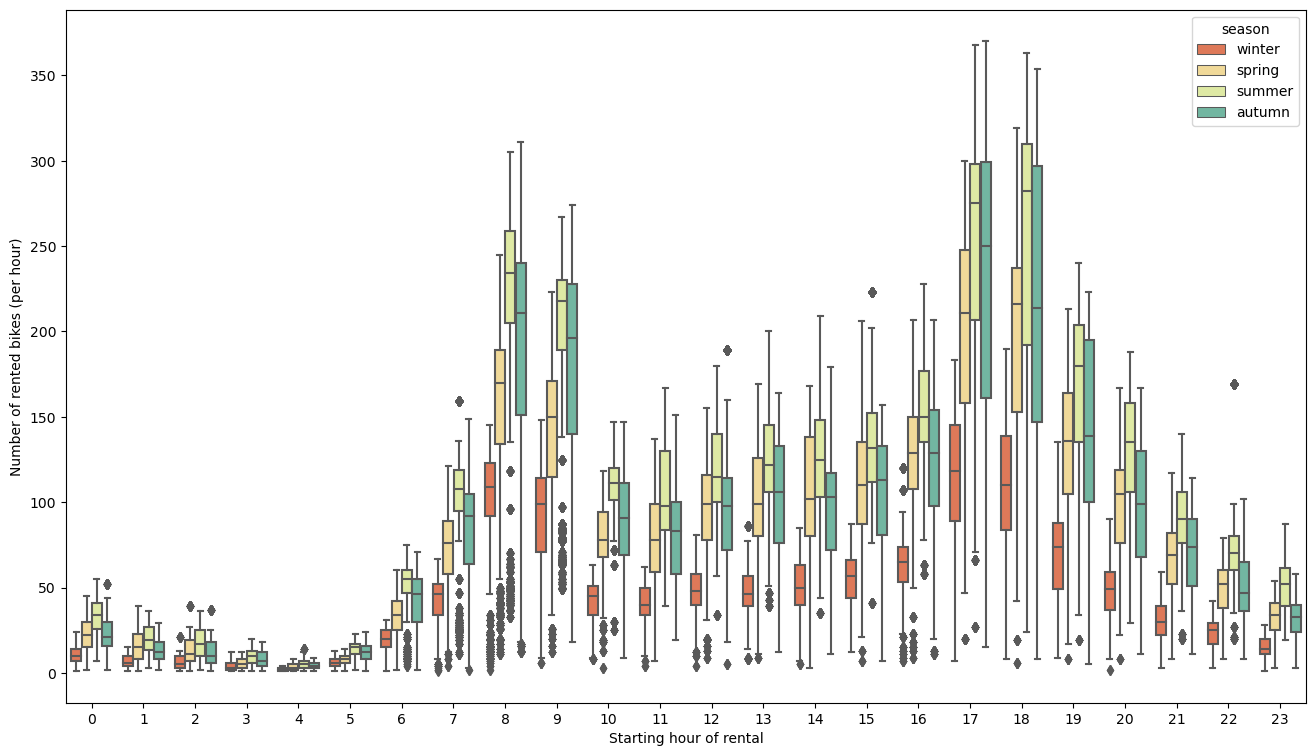

In [79]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="season")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.xlabel("Starting hour of rental")
plt.ylabel("Number of rented bikes (per hour)")
plt.show()

Nutzung ist über seasons über UHrzeit gleich, aber weniger im Winter

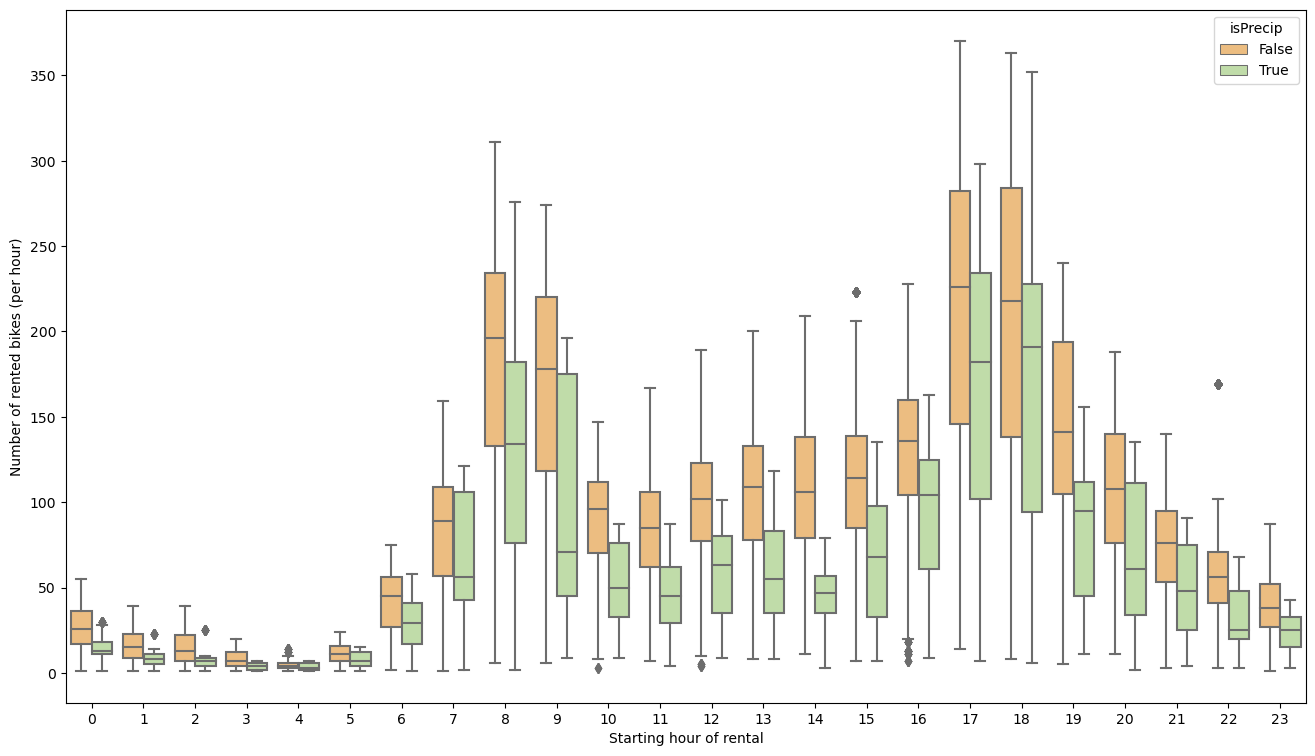

In [80]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isPrecip")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.xlabel("Starting hour of rental")
plt.ylabel("Number of rented bikes (per hour)")
plt.show()

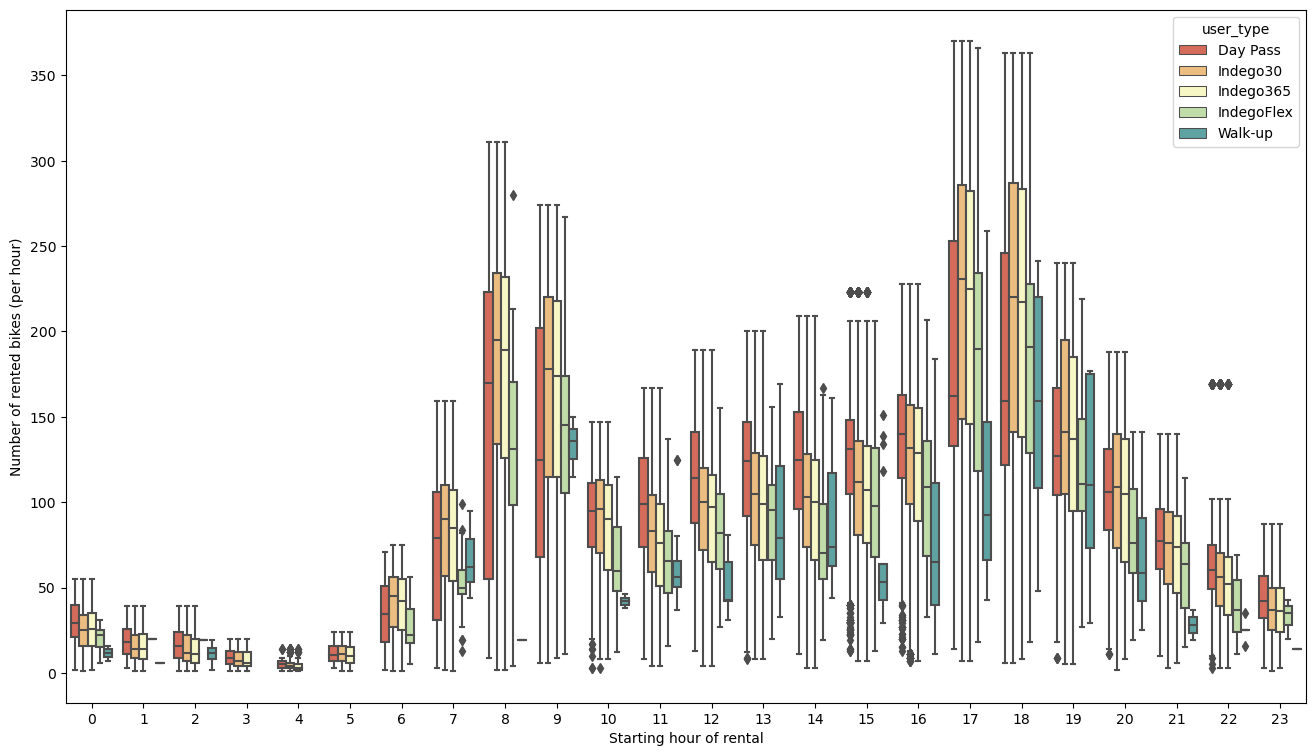

In [81]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="user_type", hue_order=["Day Pass","Indego30","Indego365","IndegoFlex","Walk-up"])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.xlabel("Starting hour of rental")
plt.ylabel("Number of rented bikes (per hour)")
plt.show()

### 2.1.4 Summary of Main Demand Patterns

In [11]:
dfFleet_usage_hourly_over_2019 = pd.DataFrame(dfPhiladelphia, columns=['start_month', 'start_time_hourly', 'numOfRentedBikesHourly'])

dfFleet_usage_hourly_over_2019 = dfFleet_usage_hourly_over_2019.groupby(['start_month', 'start_time_hourly'])['numOfRentedBikesHourly'].count().reset_index()

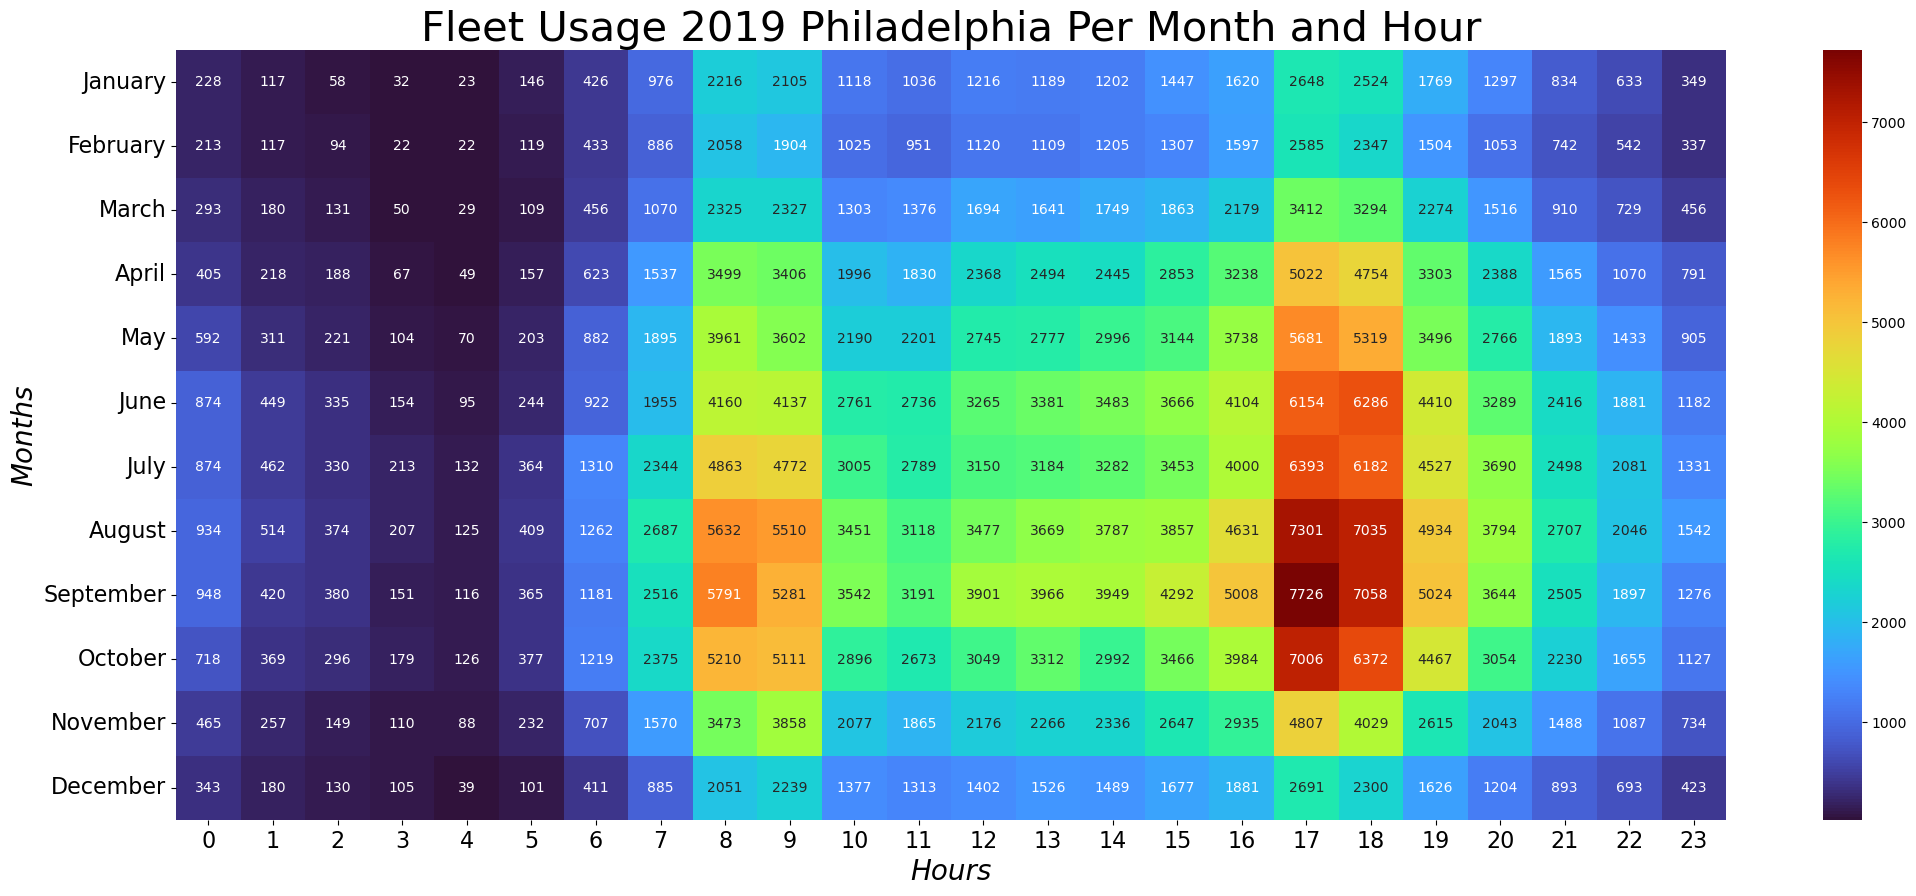

In [47]:
pivot = dfFleet_usage_hourly_over_2019.pivot(index='start_month', columns='start_time_hourly', values='numOfRentedBikesHourly')

 
hours = np.arange(0,24,1)
f, ax = plt.subplots(figsize=(25, 10), dpi=100)

ax = sns.heatmap(pivot, annot=True, fmt="d", ax=ax, xticklabels=hours, yticklabels=months, cmap="turbo")

# styling the output heatmap plot
plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=0, fontsize=16)
ax.set_xlabel('Hours', fontsize=20, style='oblique')
ax.set_ylabel('Months', fontsize=20, style='oblique')
ax.axes.set_title("Fleet Usage 2019 Philadelphia Per Month and Hour", fontsize=30)

plt.show()

## 2.2 Geographical Demand Patterns

In this section, we will:
- Which stations are particularly popular and which are not? 
- Provide a rationale as to why you observe these patterns.

### 2.2.1 Preparing Data

#### 2.2.1.1 Prepare Dataframe for All Station Locations

In [ ]:
# definition to merge the latitude & longitude coordinates for one station in a single column
def mergeStartLocation(row):
    return (row["start_latitude"], row["start_longitude"])

def mergeEndLocation(row):
    return (row["end_latitude"],row["end_longitude"])

In [ ]:
# dataframe with all unique stations and their coordinates
station_startLocations = pd.DataFrame(dfPhiladelphia, columns=['start_station_id', 'start_station_name', 'start_latitude', 'start_longitude'])
station_startLocations['startLocation'] = station_startLocations.apply(lambda row: mergeStartLocation(row), axis=1)
station_startLocations.drop_duplicates(inplace=True)
station_startLocations.sort_values(by=['start_station_id'], inplace=True)
station_startLocations.reset_index(drop=True, inplace=True)

# dataframe with all unique stations and their coordinates
station_endLocations = pd.DataFrame(dfPhiladelphia, columns=['end_station_id', 'end_station_name', 'end_latitude', 'end_longitude'])
station_endLocations['endLocation'] = station_endLocations.apply(lambda row: mergeEndLocation(row), axis=1)
station_endLocations.drop_duplicates(inplace=True)
station_endLocations.sort_values(by=['end_station_id'], inplace=True)
station_endLocations.reset_index(drop=True, inplace=True)

# test whether the start & end locations are the same 
if(station_startLocations['start_station_id'].equals(station_endLocations['end_station_id'])):
    print(station_startLocations['start_station_id'].equals(station_endLocations['end_station_id']), 
          ": The dataframes for start & end locations are equeal and thereore the end locations can be neglected.")
else:
    print(station_startLocations['start_station_id'].equals(station_endLocations['end_station_id']), 
          ": Both Dataframes include different stations IDs and must be merged.")

In [ ]:
# rename dataframe for all locations and column "start station id"
station_locations = station_startLocations
station_locations.rename(columns={"start_station_id": "station_id"}, inplace = True)
station_locations.rename(columns={"start_station_name": "station_name"}, inplace = True)
station_locations.rename(columns={"start_latitude": "latitude"}, inplace = True)
station_locations.rename(columns={"start_longitude": "longitude"}, inplace = True)
station_locations.rename(columns={"startLocation": "location"}, inplace = True)

*Note:* The dataframe station_locations only includes stations which have entries in dfPhiladelphia which means only stations with bike trips are taken into account. Maybe import dfStations from Task 1. 

#### 2.2.1.2 Preparing and Computing the Least & Most Popular Start / End Stations

In [ ]:
# create a copied dataframe to further work with it
dfPhiladelphia_copy = dfPhiladelphia

# Firstly compute the most popular start stations in descending order
# accumulate the start stations ids 
start_stations = pd.DataFrame(dfPhiladelphia_copy, columns=['start_station_id', 'numOfRentedBikes']).fillna(1)

# count trips for every start station
start_stations = start_stations.groupby(['start_station_id'])['numOfRentedBikes'].count().reset_index()

# merge with station_location dataframe to enrich data with combined coordinates
start_stations = pd.merge(station_locations, start_stations, left_on="station_id", right_on="start_station_id", how="left")

# drop unneccessary column "start_station_id"
start_stations.drop(columns="start_station_id", inplace=True)

# sort in descending order
start_stations.sort_values(by=['numOfRentedBikes'], ascending=True, inplace=True, ignore_index=True)

# rename column
start_stations.rename(columns={"numOfRentedBikes": "numOfRentedBikes_start"}, inplace = True)

In [ ]:
# secondly compute the most popular end stations in descending order
# accumulate the start stations ids 
end_stations = pd.DataFrame(dfPhiladelphia_copy, columns=['end_station_id', 'numOfRentedBikes']).fillna(1)

# count trips for every start station
end_stations = end_stations.groupby(['end_station_id'])['numOfRentedBikes'].count().reset_index()

# merge with station_location dataframe to enrich data with combined coordinates
end_stations = pd.merge(station_locations, end_stations, left_on="station_id", right_on="end_station_id", how="left")

# drop unneccessary column "start_station_id"
end_stations.drop(columns="end_station_id", inplace=True)

# sort in descending order
end_stations.sort_values(by=['numOfRentedBikes'], ascending=True, inplace=True, ignore_index=True)

# rename column
end_stations.rename(columns={"numOfRentedBikes": "numOfRentedBikes_end"}, inplace = True)

In [ ]:
# Method for retrieving the top x interaction stations
# Compute sum of start and end, append all values of ending rentals to starting rentals 
# and then group by the station name and sum the counter values. Then sort and take the first x values.

# merge
combined_stations = pd.merge(start_stations, end_stations, left_on="station_id", right_on="station_id", how="left")

# rename columns
combined_stations.rename(columns={"station_name_x": "station_name"}, inplace = True)
combined_stations.rename(columns={"latitude_x": "latitude"}, inplace = True)
combined_stations.rename(columns={"longitude_x": "longitude"}, inplace = True)
combined_stations.rename(columns={"location_x": "location"}, inplace = True)

# add the number of rented bikes for each station 
combined_stations["numOfRentedBikes"] = combined_stations['numOfRentedBikes_start'] + combined_stations['numOfRentedBikes_end']

# drop unneccessary column 
combined_stations.drop(columns=['station_name_y', 'latitude_y', 'longitude_y', 'location_y'], inplace=True)

# sort in descending order
combined_stations.sort_values(by=['numOfRentedBikes'], ascending=True, inplace=True, ignore_index=True)

# rename column
combined_stations.rename(columns={"numOfRentedBikes": "numOfRentedBikes_combined"}, inplace = True)

### 2.2.2 Plot the Data for Least & Most Popular Stations

#### 2.2.2.1 Visualization of Data for the Most Popular Stations in Philadelphia

In [ ]:
# prepare dataframe combined_stations for plotting
popularity_stations = pd.DataFrame(combined_stations, columns=['station_name', 'numOfRentedBikes_start', 'numOfRentedBikes_end', 'numOfRentedBikes_combined'])

# set index to station name 
popularity_stations.set_index(['station_name'], inplace=True)

# Method to Plot the data
def plot_popularity_stations(popularity, x):
    if popularity == 'most popular':
        ax = popularity_stations.tail(x).plot(kind="barh", figsize=(60,40), fontsize=50, width=0.8)
        ax.set_xlabel('Number of rented bikes', fontsize=60)
        ax.set_ylabel('Station names', fontsize = 60)
        ax.set_title(label= str(x) + ' most popular starting stations', fontsize = 80)
        ax.legend(fontsize = 40)
    elif popularity == 'least popular':
        ax = popularity_stations.tail(x).plot(kind="barh", figsize=(60,40), fontsize=50, width=0.8)
        ax.set_xlabel('Number of rented bikes', fontsize=60)
        ax.set_ylabel('Station names', fontsize = 60)
        ax.set_title(label= str(x) + ' least popular starting stations', fontsize = 80)
        ax.legend(fontsize = 40)
    else:
        ax = 'Please define the popularity with either "most popular" or "least popular".'
    return ax

In [ ]:
plot_popularity_stations('most popular', 20)

#### 2.2.2.2 Visualization of Data for the Least Popular Stations in Philadelphia

In [ ]:
popularity_stations.sort_values(by=['numOfRentedBikes_combined'], ascending=False, inplace=True)

plot_popularity_stations('least popular', 20)

#### 2.2.2.3 Analysis of Distances of Popular Stations to City Center of Philadelphia

In order to put the most popular stations into context of Philadelphia, we calculate the distances from city center.

### 2.2.3 Geographical analysis and Visualization of Location Data

In [ ]:
# load station data using Python JSON module
with open('data/stations/stations.json','r') as f:
    stations = json.loads(f.read())
# Flatten data
dfStations_input = pd.json_normalize(stations, record_path =['features'])

In [ ]:
dfStations_input = pd.json_normalize(stations, record_path =['features'])

dfStations_cov = pd.DataFrame(dfStations_input, columns=['properties.id', 'properties.name', 'geometry.coordinates'])
dfStations_cov.rename(columns={"properties.id": "station_id"}, inplace = True)
dfStations_cov.rename(columns={"properties.name": "station_name"}, inplace = True)
dfStations_cov.rename(columns={"geometry.coordinates": "station_coordinates"}, inplace = True)
dfStations_cov.head()

In [ ]:
# # load station data using Python JSON module
#https://www.opendataphilly.org/dataset/planning-districts/resource/a166016e-f9c8-47b2-bd19-fc1622dff1c3
#https://opendata.arcgis.com/datasets/0960ea0f38f44146bb562f2b212075aa_0.geojson
with open('data/districts/Planning_Districts.geojson','r') as f:
    districts = json.loads(f.read())
# Flatten data
df_districts_input = pd.json_normalize(districts, record_path =['features'])
df_districts_input.head()

In [ ]:
df_districts = df_districts_input.copy()[["properties.OBJECTID_1", "properties.DIST_NAME", "properties.ABBREV", "geometry.coordinates"]]
df_districts.rename(columns={"properties.OBJECTID_1": "id"}, inplace = True)
df_districts.rename(columns={"properties.DIST_NAME": "name"}, inplace = True)
df_districts.rename(columns={"properties.ABBREV": "abbrev"}, inplace = True)
df_districts.rename(columns={"geometry.coordinates": "coordinates"}, inplace = True)

# need to be unpacked from nested list
df_districts["coordinates"] = df_districts["coordinates"].map(lambda x: [num for sublist in x for num in sublist])
df_districts.head()

In [ ]:
# pip install shapely

In [ ]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

polygons = []
for i in df_districts["coordinates"]:
    polygons.append(Polygon(i))

def a(row):
    point = Point(row)
    
    for i in range(len(polygons)):
        if(polygons[i].contains(point)):
            return i+1
    
    return -1
    
# initalize district_id with -1
dfStations_cov["district_id"] = -1
#get the districts
dfStations_cov["district_id"] = dfStations_cov["station_coordinates"].map(lambda x: a(x))

station_columns = ["station_id", "station_name", "station_coordinates", "district_id"]
district_columns = ["id", "name", "abbrev"]

dfStations_cov = pd.merge(dfStations_cov[station_columns], df_districts[district_columns], left_on="district_id", right_on="id", how="left")

dfStations_cov.rename(columns={"district_id": "district_id"}, inplace = True)
dfStations_cov.rename(columns={"name": "district_name"}, inplace = True)
dfStations_cov.rename(columns={"abbrev": "district_abbrev"}, inplace = True)
dfStations_cov.drop(columns=["id"],axis=1, inplace=True)

dfStations_cov

In [ ]:
df_phil_station = dfPhiladelphia_with_0_trips.copy()
df_phil_station = pd.merge(dfPhiladelphia_with_0_trips, dfStations_cov[["station_id", "district_id", "district_name", "district_abbrev"]], "left", left_on="start_station_id", right_on="station_id")
df_phil_station.rename(columns={"district_id": "start_district_id", "district_name": "start_district_name", "district_abbrev": "start_district_abbrev"}, inplace = True)
df_phil_station = pd.merge(df_phil_station, dfStations_cov[["station_id","district_id", "district_name", "district_abbrev"]], "left", left_on="end_station_id", right_on="station_id")
df_phil_station.rename(columns={"district_id": "end_district_id", "district_name": "end_district_name", "district_abbrev": "end_district_abbrev"}, inplace = True)

df_phil_station.drop(columns=["station_id_x"], inplace = True)
df_phil_station.drop(columns=["station_id_y"], inplace = True)
df_phil_station

In [ ]:
# how many stations per district
stations_per_district = dfStations_cov[["station_name", "district_name"]].groupby(["district_name"]).count().sort_values("station_name", ascending=False)
stations_per_district.plot(kind="bar", xlabel="District name", ylabel="Number of stations per district")
plt.legend(["Number of stations per district"])
plt.grid()
plt.show()

In [ ]:
rides_from_disctrict = df_phil_station[["start_district_name", "numOfRentedBikesHourly"]].groupby("start_district_name").count().sort_values("numOfRentedBikesHourly", ascending=False)
rides_from_disctrict.rename(columns={"numOfRentedBikesHourly" : "Number of rides"}, inplace=True)
rides_from_disctrict.plot(kind="bar", xlabel="District name", ylabel="Number of rides per district")
plt.legend(["Number of rides per district"])
plt.grid()
plt.show()

In [ ]:
#Number of rides taken from one district X to district Y 
rides_taken_dist_to_dist = df_phil_station[df_phil_station["numOfRentedBikesHourly"] > 0][["start_district_name", "end_district_name", "numOfRentedBikesHourly"]].groupby(["start_district_name", "end_district_name"]).count()
rides_taken_dist_to_dist.rename(columns={"numOfRentedBikesHourly" : "Number of rides"}, inplace=True)
rides_taken_dist_to_dist

In [ ]:
# import folium for map creation
import folium
from folium import plugins
from folium.plugins import HeatMap

#### 2.2.3.1 Visualization of Most & Least Popular Stations (Start & End Combined)

In [ ]:
# Create a new map for Philadelphia
lat_mean = station_locations.latitude.mean()
lon_mean = station_locations.longitude.mean()
philadelphia = folium.Map(location=[lat_mean, lon_mean], zoom_start=12,
                          control_scale = True, tiles ='Stamen Toner')

In [ ]:
# function to add markers to the map
def add_markers_to_map(df1, city_map, color):
    for i in df1.index.values:
        
        s1 = "Station:"
        s2 = str(combined_stations.iloc[i]['station_name'])
        s3 = "Rides:"
        s4 = str(combined_stations.iloc[i]['numOfRentedBikes_combined'])
        station_info = s1 + " " + s2 + " " + s3 + " " + s4 
        
        folium.CircleMarker(
                location=combined_stations.iloc[i]['location'],
                radius=1,
                weight=5,
                color=color,
                popup= station_info
               ).add_to(philadelphia)

In [ ]:
# add markers for the remaining stations to map
add_markers_to_map(combined_stations.iloc[20:126], philadelphia, 'darkgrey')

# add markers for top 20 stations to map
add_markers_to_map(combined_stations.tail(20), philadelphia, 'lime')

# add markers for bottom 20 stations to map
add_markers_to_map(combined_stations.head(20), philadelphia, 'red')

In [ ]:
philadelphia

#### 2.2.3.2 Visualizing the Amount of Trips at each Station via Heatmaps 

In [ ]:
phillyTrips = pd.DataFrame(dfPhiladelphia, columns=['start_station_id', 'end_station_id', 'bike_id', 'start_latitude',  'start_longitude', 'end_latitude', 'end_longitude'])
phillyTrips['startLocation'] = phillyTrips.apply(lambda row: mergeStartLocation(row), axis=1)
phillyTrips['endLocation'] = phillyTrips.apply(lambda row: mergeEndLocation(row), axis=1)

In [ ]:
# store all coordinates (start & end) of every trip in a list for heatmap 
heat_data = phillyTrips['startLocation'].to_list()
heat_data = heat_data + phillyTrips['endLocation'].to_list()

# create new map
philadelphia_heatmap = philadelphia

# add a heatmap
philadelphia_heatmap = philadelphia.add_child(plugins.HeatMap(heat_data, zoom_start=13, radius=20))
# philadelphia_heatmap

### 2.2.4 Summary and Observed Patterns of Data

## 2.3 Key Performance Indicators (KPIs)

In this section, we will:
- Define at least (!) three KPIs that you would include in a dashboard for a fleet operators. These KPIs must provide an immediate overview of the current fleet operations and how well the fleet is doing in terms of **utilization**, **revenue**, **coverage** and/or **other business-related aspects**. 
- Briefly explain the rationale behind selecting each KPI, explain why you have chosen it and where needed provide references.
- Calculate hourly values for the selected KPIs for the city/year in your dataset and visualize them over time. 
- Which trends do you observe? How do you explain them?

#### Preperation

In [ ]:
dfStations = pd.DataFrame(dfStations_input, columns=['properties.id', 'properties.name','properties.bikesAvailable',
                                               'properties.classicBikesAvailable', 'properties.smartBikesAvailable',
                                               'properties.electricBikesAvailable', "properties.totalDocks"])
dfStations.rename(columns={"properties.id": "station_id"}, inplace = True)
dfStations.rename(columns={"properties.name": "station_name"}, inplace = True)
dfStations.rename(columns={"properties.bikesAvailable": "bikes_available"}, inplace = True)
dfStations.rename(columns={"properties.classicBikesAvailable": "classic_bikes_available"}, inplace = True)
dfStations.rename(columns={"properties.smartBikesAvailable": "smart_bikes_available"}, inplace = True)
dfStations.rename(columns={"properties.electricBikesAvailable": "electric_bikes_available"}, inplace = True)
dfStations.rename(columns={"properties.totalDocks": "docks_total"}, inplace = True)
dfStations.head()

### 2.3.1 KPI: `Utilization`

We can measure the utilization when we <br> 
(1) know how many bikes we have in our system or <br> 
(2) know how many bikes are currently in usage. <br>
(3) how many rides/rentals happen per hour (average, total) 

Because we only have a snapshot (from 2023 https://www.rideindego.com/wp-content/uploads/2022/12/indego-stations-2022-10-01.csv) and no time series data of all stations we cannot measure historical utilizations. What we can show is a way of measuring the utilization as an KPI. 

##### 2.3.1.1 - How many bikes do we have in our system? How many bikes from which type are available/in our system? 

In [ ]:
# Data from the company to add additional features; Source: https://www.rideindego.com/about/data/
q1 = pd.read_csv("data/company_quartals/indego-trips-2019-q1.csv.zip")
q2 = pd.read_csv("data/company_quartals/indego-trips-2019-q2.csv.zip")
q3 = pd.read_csv("data/company_quartals/indego-trips-2019-q3-1.zip")
q4 = pd.read_csv("data/company_quartals/indego-trips-2019-q4.csv.zip")

dfPhiladelphia_comp = pd.concat(objs=[q1, q2, q3, q4])

bikes = dfPhiladelphia_comp.copy()
bikes_unique = bikes[["bike_id", "bike_type"]].drop_duplicates()
bike_count = bikes_unique["bike_id"].count()
print(f"We have {bike_count} bikes in our system (that got used in the year 2019).")

In [ ]:
all_available_bikes = dfStations["bikes_available"].sum()
all_available_classical_bikes = dfStations["classic_bikes_available"].sum()
all_available_electric_bikes = dfStations["electric_bikes_available"].sum()
all_available_smart_bikes = dfStations["smart_bikes_available"].sum()

print(f"There are currently {all_available_bikes} out of {bike_count} available.")
print(f"There are currently {all_available_classical_bikes} classical bikes available.")
print(f"There are currently {all_available_electric_bikes} electrical bikes available.")
print(f"There are currently {all_available_smart_bikes} smart bikes available.")

If we measure usability as bike availability at different stations we could model the availability at different stations like in the following

In [ ]:
station_filtered = dfStations[["station_name", "bikes_available", "classic_bikes_available", "electric_bikes_available", "docks_total"]].groupby("station_name").sum().sort_values(by='bikes_available', ascending=False)
station_filtered["utilization"] = 0
station_filtered["utilization"] = np.round(100 - station_filtered["bikes_available"] / station_filtered["docks_total"] * 100, 2)
station_ranked_util = station_filtered.sort_values(by="utilization", ascending=False)
station_ranked_util

The dataframe `station_ranked` shows a ranking of utilization measured in percent for each station. <br>
We can see that at stations like "19th & Market" or "11th & Poplar, John F. Street Community Center" all bikes are rented and no bikes are available. 

In comparison to that stations like "2nd & Brown" and "6th & S Washington Square" have almost all docks used so many there are many bikes available.

#### 2.3.1.2 - How many bikes are "currently" available? Example with a random dataset and an one hour interval from the rented time

To model a dashboard like perspective of the KPI, we assume a random timestamp from the dataframe to model The hourly time interval of the last hour. With this technique we will measure the utilization and revenue KPIs in the following sections.

In [ ]:
#random dataset sampled
random_dataset = dfPhiladelphia.sample()

#start hour, end hour and date extracted
rand_start = random_dataset["start_time_hourly"].values[0]
rand_end = rand_start + 1
rand_date = random_dataset["start_date"].values[0]

#filter all rides that took place within the interval
dfPh_one_hour = dfPhiladelphia[
    (dfPhiladelphia["start_date"] == rand_date) &
    (((dfPhiladelphia["start_time_hourly"] <= rand_start) & (dfPhiladelphia["end_time_hourly"] >= rand_start) & (dfPhiladelphia["end_time_hourly"] <= rand_end)) | 
    ((dfPhiladelphia["start_time_hourly"] <= rand_start) & (dfPhiladelphia["end_time_hourly"] >= rand_start) & (dfPhiladelphia["end_time_hourly"] >= rand_end)) |
    ((dfPhiladelphia["start_time_hourly"] >= rand_start) & (dfPhiladelphia["start_time_hourly"] < rand_end) & (dfPhiladelphia["end_time_hourly"] >= rand_start) & (dfPhiladelphia["end_time_hourly"] <= rand_end)) |
    ((dfPhiladelphia["start_time_hourly"] >= rand_start) & (dfPhiladelphia["start_time_hourly"] < rand_end) & (dfPhiladelphia["end_time_hourly"] >= rand_end)) )
     ]

bikes_used_2019 = dfPhiladelphia["bike_id"].drop_duplicates()

print("Random date is", rand_date, "\nThe hourly time interval of", rand_start, "-", rand_end, "included these information:")
print(len(dfPh_one_hour), "rides were starting or ending in the interval.")
print(len(dfPh_one_hour["bike_id"].drop_duplicates()), "different bikes got rented in that hour.")

#### 2.3.1.3 Utilization over time 

##### Average number of rides per hour

In [ ]:
#because we average here, we need the dataset with 0 trips
grouped_hours = dfPhiladelphia_with_0_trips[["start_time_hourly", "numOfRentedBikesHourly"]].groupby("start_time_hourly").mean()
grouped_hours.plot(kind='bar', ylabel='Number of rides', xlabel='hour', figsize=(16,12), alpha=1)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Number of rides")
plt.title("Average number of rides per hour")
plt.legend(["Average number of rides"])
plt.show()

In this plot it can be seen that there are the most average bike rides in the rush hours before and after work.  

##### Total number of rides per hour 

In [ ]:
grouped_hours = dfPhiladelphia[["start_time_hourly", "numOfRentedBikesHourly"]].groupby("start_time_hourly").count()
grouped_hours.plot(kind='bar', ylabel='Number of rides', xlabel='hour', figsize=(16,12), label='Num rides without 0', alpha=1)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Number of rides")
plt.title("Total number of rides per hour")
plt.legend(["Number of rides"])
plt.show()

In this plot it can be seen that there are the most total bike rides in the rush hours before and after work.  

### 2.3.2 KPI: `Revenue`

We found some sources for prices that Indego charges their customers which we will apply as best as we can. Additionally we will apply a custom price model, because we don't have enough information about the subscription count which would normally be included in the revenue.

With the KPI Revenue we are interested in questions like `How much money does the company makes right now?` or `How much money did the company made in month X/year Y?`

From sources on the internet (https://www.rideindego.com/buy-a-pass/#/) we found subscription costs for the user types: <br>
(1) Day Pass: $15 + tax <br>
(2) Indego30 (month-pass): $30 + tax <br>
(3) Indego365 (year-pass): $156 + tax<br>

We could not find any current information for the walk-up user type, but we found an older price that was $4/30 minutes which is around $0.13/minute.

Additionally when subscribers rent a bike for more than 60 minutes they have to pay additional \$0.2/minute. The same amount of \$2/minute is demanded when an e-bike is rented. 

Because we don't have any user information like an id or similar we cannot say how much revenue the company made in a specific time, but in the following we present one way of measuring the revenue of the rides in 2019 with the prices we have. Afterwards we present a custom price model with assumptions.


#### 2.3.2.1 Ingego Cost model 

In [ ]:
sub_prices = {
    "Day Pass": 15,
    "Indego30": 30,
    "Indego365": 156,  
}

prices_per_min = {
    "Subscriber": 0.2,
    "Walk-up": 0.133 # https://nacto.org/wp-content/uploads/2016/04/2015_Indego_Indego-Membership-and-Pricing_Brochure.pdf 4 $ per 30 mins
}

ebikes_per_min = {
    "Subscriber": 0.2,
    "Walk-up": 0.2
}
    
dfPhiladelphia_with_0_trips["tripduration_min"] = dfPhiladelphia_with_0_trips["tripduration_sec"]/60
dfPhiladelphia_with_0_trips["trip_revenue"] = 0

#walk-up customers have to pay 4$/30 minutes
walk_up = (dfPhiladelphia_with_0_trips["user_type"] == "Walk-up")  
dfPhiladelphia_with_0_trips.loc[walk_up, "trip_revenue"] = np.ceil(dfPhiladelphia_with_0_trips["tripduration_min"] / 30) * 4 

#non-walk-up customers can ride for free in the first 60 minutes, but for every additional hour they have to pay 0.2 $ 
not_walk_up_over_60 = (dfPhiladelphia_with_0_trips["user_type"] != "Walk-up") & (dfPhiladelphia_with_0_trips["tripduration_min"] > 60)
dfPhiladelphia_with_0_trips.loc[not_walk_up_over_60, "trip_revenue"] = (dfPhiladelphia_with_0_trips["tripduration_min"] - 60) * prices_per_min["Subscriber"]

#all customers have to pay 0.2$/minute when they rent an e-bike 
e_bike = (dfPhiladelphia_with_0_trips["bike_type"] == "electric")
dfPhiladelphia_with_0_trips.loc[e_bike, "trip_revenue"] = dfPhiladelphia_with_0_trips["trip_revenue"] + (dfPhiladelphia_with_0_trips["tripduration_min"] * ebikes_per_min["Subscriber"])

dfPhiladelphia_with_0_trips[["user_type", "tripduration_min", "trip_revenue"]].head()

In [ ]:
print("With this cost model and without subscriptions the company would have made about $", np.round(dfPhiladelphia_with_0_trips["trip_revenue"].sum(),2), "in the year 2019.")

In [ ]:
january = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_month"] == 1)]
february = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_month"] == 2)]
march = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_month"] == 3)]
april = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_month"] == 4)]
may = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_month"] == 5)]
june = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_month"] == 6)]
july = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_month"] == 7)]
august = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_month"] == 8)]
september = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_month"] == 9)]
october = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_month"] == 10)]
november = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_month"] == 11)]
december = dfPhiladelphia_with_0_trips[(dfPhiladelphia_with_0_trips["start_month"] == 12)] 

print(
    " Januray revenue: $", np.round(january["trip_revenue"].sum(), 2), "\n",
    "February revenue: $", np.round(february["trip_revenue"].sum(), 2), "\n",
    "March revenue: $", np.round(march["trip_revenue"].sum(), 2), "\n",
    "April revenue: $", np.round(april["trip_revenue"].sum(), 2), "\n",
    "May revenue: $", np.round(may["trip_revenue"].sum(), 2), "\n",
    "June revenue: $", np.round(june["trip_revenue"].sum(), 2), "\n",
    "July revenue: $", np.round(july["trip_revenue"].sum(), 2), "\n",
    "August revenue: $", np.round(august["trip_revenue"].sum(), 2), "\n",
    "September revenue: $", np.round(september["trip_revenue"].sum(), 2), "\n",
    "October revenue: $", np.round(october["trip_revenue"].sum(), 2), "\n",
    "November revenue: $", np.round(november["trip_revenue"].sum(), 2), "\n",
    "December revenue: $", np.round(december["trip_revenue"].sum(), 2), "\n",
    "-------------- \n Overall revenue 2019: $", np.round(dfPhiladelphia_with_0_trips["trip_revenue"].sum(),2)
)

In [ ]:
#filter all rides that took place within the interval
dfPh_one_hour_rev = dfPhiladelphia_with_0_trips[
    (dfPhiladelphia_with_0_trips["start_date"] == rand_date) &
    (((dfPhiladelphia_with_0_trips["start_time_hourly"] <= rand_start) & (dfPhiladelphia_with_0_trips["end_time_hourly"] >= rand_start) & (dfPhiladelphia_with_0_trips["end_time_hourly"] <= rand_end)) | 
    ((dfPhiladelphia_with_0_trips["start_time_hourly"] <= rand_start) & (dfPhiladelphia_with_0_trips["end_time_hourly"] >= rand_start) & (dfPhiladelphia_with_0_trips["end_time_hourly"] >= rand_end)) |
    ((dfPhiladelphia_with_0_trips["start_time_hourly"] >= rand_start) & (dfPhiladelphia_with_0_trips["start_time_hourly"] < rand_end) & (dfPhiladelphia_with_0_trips["end_time_hourly"] >= rand_start) & (dfPhiladelphia_with_0_trips["end_time_hourly"] <= rand_end)) |
    ((dfPhiladelphia_with_0_trips["start_time_hourly"] >= rand_start) & (dfPhiladelphia_with_0_trips["start_time_hourly"] < rand_end) & (dfPhiladelphia_with_0_trips["end_time_hourly"] >= rand_end)) )
     ]

print("The revenue in the randomly selected hour would be: $", np.round(dfPh_one_hour_rev["trip_revenue"].sum(),2 ))

##### Average revenue of rides per hour 

In [ ]:
#because we average here, we need the dataset with 0 trips
grouped_hours = dfPhiladelphia_with_0_trips[["start_time_hourly", "trip_revenue"]].groupby("start_time_hourly").mean()
grouped_hours.plot(kind='bar', figsize=(16,12), alpha=1)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Average revenue per hour")
plt.title("Average revenue per hour")
plt.legend(["Average revenue per hour"])
plt.show()

We see that here it is not the case that rush hours cause the most revenue per hour on average. The fact that other hours create a higher revenue could be related to less rides that there are in these hours.

##### Total revenue of rides per hour 

In [ ]:
grouped_hours = dfPhiladelphia_with_0_trips[["start_time_hourly", "trip_revenue"]].groupby("start_time_hourly").sum()
grouped_hours.plot(kind='bar', figsize=(16,12), alpha=1)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Total revenue per hour")
plt.title("Total revenue per hour")
plt.legend(["Total revenue per hour"])
plt.show()

In this plot it can be seen that there is a higher revenue in total on the days in comparison to the nights. This is of course because on the days more people rent bikes.

#### 2.3.2.2 Alternative Cost model 

In the alternative cost model we make following assumptions:

(1) Subscriber do not have to pay per unlock of the bike, Walk-ups have to pay \$1 per unlock <br>
(2) Subscriber and Walk-ups have to pay \$0.2 per minute <br>
(3) Subscriber and Walk-ups have to pay additional \$0.2 per minute if the rented bike is electric <br>

In [ ]:
# price per unlock
price_per_unlock = {
    "Subscriber": 0,
    "Walk-up": 1
}

# price per minute
price_per_minute = {
    "Subscriber": 0.2,   
    "Walk-up": 0.25
} 

# price per minute
ebike_price_per_minute = {
    "Subscriber": 0.1,   
    "Walk-up": 0.15
} 
    
dfPhiladelphia_alt = dfPhiladelphia_with_0_trips.copy()

dfPhiladelphia_alt["trip_revenue"] = 0

#walk-up customers have to pay more per unlock
walk_up = (dfPhiladelphia_alt["user_type"] == "Walk-up")  
dfPhiladelphia_alt.loc[walk_up, "trip_revenue"] = price_per_unlock["Walk-up"] + dfPhiladelphia_alt["tripduration_min"] * price_per_minute["Walk-up"]
 
non_walk_up = (dfPhiladelphia_alt["user_type"] != "Walk-up")
dfPhiladelphia_alt.loc[non_walk_up, "trip_revenue"] = price_per_unlock["Subscriber"] + dfPhiladelphia_alt["tripduration_min"] * price_per_minute["Subscriber"]

#all customers have to pay extra when they rent an e-bike 
e_bike_sub = ((dfPhiladelphia_alt["user_type"] != "Walk-up") & (dfPhiladelphia_alt["bike_type"] == "electric"))
dfPhiladelphia_alt.loc[e_bike, "trip_revenue"] = dfPhiladelphia_alt["trip_revenue"] + (dfPhiladelphia_alt["tripduration_min"] * ebike_price_per_minute["Subscriber"])

#all customers have to pay extra when they rent an e-bike 
e_bike_non_sub = ((dfPhiladelphia_alt["user_type"] == "Walk-up") & (dfPhiladelphia_alt["bike_type"] == "electric"))
dfPhiladelphia_alt.loc[e_bike, "trip_revenue"] = dfPhiladelphia_alt["trip_revenue"] + (dfPhiladelphia_alt["tripduration_min"] * ebike_price_per_minute["Walk-up"])

dfPhiladelphia_alt[["user_type", "tripduration_min", "trip_revenue"]].head()

In [ ]:
print("With this alternative cost model and without subscriptions the company would have made about $", np.round(dfPhiladelphia_alt["trip_revenue"].sum(),2), "in the year 2019.")

In [ ]:
january = dfPhiladelphia_alt[(dfPhiladelphia_alt["start_month"] == 1)] 
february = dfPhiladelphia_alt[(dfPhiladelphia_alt["start_month"] == 2)]
march = dfPhiladelphia_alt[(dfPhiladelphia_alt["start_month"] == 3)]
april = dfPhiladelphia_alt[(dfPhiladelphia_alt["start_month"] == 4)]
may = dfPhiladelphia_alt[(dfPhiladelphia_alt["start_month"] == 5)]
june = dfPhiladelphia_alt[(dfPhiladelphia_alt["start_month"] == 6)]
july = dfPhiladelphia_alt[(dfPhiladelphia_alt["start_month"] == 7)]
august = dfPhiladelphia_alt[(dfPhiladelphia_alt["start_month"] == 8)]
september = dfPhiladelphia_alt[(dfPhiladelphia_alt["start_month"] == 9)]
october = dfPhiladelphia_alt[(dfPhiladelphia_alt["start_month"] == 10)]
november = dfPhiladelphia_alt[(dfPhiladelphia_alt["start_month"] == 11)]
december = dfPhiladelphia_alt[(dfPhiladelphia_alt["start_month"] == 12)]

print(
    " Januray revenue: $", np.round(january["trip_revenue"].sum(), 2), "\n",
    "February revenue: $", np.round(february["trip_revenue"].sum(), 2), "\n",
    "March revenue: $", np.round(march["trip_revenue"].sum(), 2), "\n",
    "April revenue: $", np.round(april["trip_revenue"].sum(), 2), "\n",
    "May revenue: $", np.round(may["trip_revenue"].sum(), 2), "\n",
    "June revenue: $", np.round(june["trip_revenue"].sum(), 2), "\n",
    "July revenue: $", np.round(july["trip_revenue"].sum(), 2), "\n",
    "August revenue: $", np.round(august["trip_revenue"].sum(), 2), "\n",
    "September revenue: $", np.round(september["trip_revenue"].sum(), 2), "\n",
    "October revenue: $", np.round(october["trip_revenue"].sum(), 2), "\n",
    "November revenue: $", np.round(november["trip_revenue"].sum(), 2), "\n",
    "December revenue: $", np.round(december["trip_revenue"].sum(), 2), "\n",
    "-------------- \n Overall revenue 2019: $", np.round(dfPhiladelphia_alt["trip_revenue"].sum(),2)
)


In [ ]:
#filter all rides that took place within the interval
dfPh_one_hour_rev_alt = dfPhiladelphia_with_0_trips[
    (dfPhiladelphia_alt["start_date"] == rand_date) &
    (((dfPhiladelphia_alt["start_time_hourly"] <= rand_start) & (dfPhiladelphia_alt["end_time_hourly"] >= rand_start) & (dfPhiladelphia_alt["end_time_hourly"] <= rand_end)) | 
    ((dfPhiladelphia_alt["start_time_hourly"] <= rand_start) & (dfPhiladelphia_alt["end_time_hourly"] >= rand_start) & (dfPhiladelphia_alt["end_time_hourly"] >= rand_end)) |
    ((dfPhiladelphia_alt["start_time_hourly"] >= rand_start) & (dfPhiladelphia_alt["start_time_hourly"] < rand_end) & (dfPhiladelphia_alt["end_time_hourly"] >= rand_start) & (dfPhiladelphia_alt["end_time_hourly"] <= rand_end)) |
    ((dfPhiladelphia_alt["start_time_hourly"] >= rand_start) & (dfPhiladelphia_alt["start_time_hourly"] < rand_end) & (dfPhiladelphia_alt["end_time_hourly"] >= rand_end)) )
     ]

print("The revenue with the alternative cost model and in the randomly selected hour would be: $", np.round(dfPh_one_hour_rev_alt["trip_revenue"].sum(),2 ))

##### Average revenue of rides per hour 

In [ ]:
grouped_hours = dfPhiladelphia_alt[["start_time_hourly", "trip_revenue"]].groupby("start_time_hourly").mean()
grouped_hours.plot(kind='bar', figsize=(16,12), alpha=1)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Average revenue per hour")
plt.title("Average revenue per hour")
plt.legend(["Average revenue per hour"])
plt.show()

In this plot you can see an almost uniform distributed revenue over the whole day on average. That is because of the cost model's modification.  

##### Total revenue of rides per hour

In [ ]:
grouped_hours = dfPhiladelphia_alt[["start_time_hourly", "trip_revenue"]].groupby("start_time_hourly").sum()
grouped_hours.plot(kind='bar', figsize=(16,12), alpha=1)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Total revenue per hour")
plt.title("Total revenue per hour")
plt.legend(["Total revenue per hour"])
plt.show()

In this plot you can see the local and global peeks around the rush hours and an slowly increasing and decreasing from the morning to the after work rush hour when revenues decrease over night until the next work day.  

### 2.3.3 KPI: `Coverage`

##### 2.3.3.1 How many stations are there per district?

In [ ]:
# how many stations per district
stations_per_district = dfStations_cov[["station_name", "district_name"]].groupby(["district_name"]).count().sort_values("station_name", ascending=False)
stations_per_district.plot(kind="bar", xlabel="District name", ylabel="Number of stations per district")
plt.legend(["Number of stations per district"])
plt.grid()
plt.show()

The more stations there are per district, the more covered are these stations. For example the "Central" district is the best covered and "River Wards" is the least best covered district when we only look at the number of stations per district.

##### 2.3.3.2 Map visualization of KPI Coverage

##### Preperation

In [ ]:
# pip install folium

In [ ]:
import folium

##### Average number of rides per station and per hour

In [ ]:
# group by station name and start hour with value = mean
grouped_hours_district_mean = df_phil_station[["start_time_hourly", "start_station_name", "numOfRentedBikesHourlyStationDependent"]].groupby(["start_station_name", "start_time_hourly"], as_index=False).mean().round(2)
grouped_hours_district_mean

To visualize these values per hour in a heatmap, we would need 24 different maps. For simplification we will not do this but the dataset above describes all number of rides/rentals per hour per station. <br>
In the following we will visualize the average number of rides/rentals per station over the whole year as a heatmap.   

In [ ]:
# group by station name and start hour with value = mean
grouped_hours_district_mean_sim = df_phil_station[["start_station_name", "numOfRentedBikesHourlyStationDependent"]].groupby(["start_station_name"], as_index=False).mean().round(2)
grouped_hours_district_mean_sim.head()

In [ ]:
#base map
map_heatmap_avg = folium.Map(location=[lat_mean, lon_mean], zoom_start=13)

# add geojson file to map
folium.GeoJson('data/districts/Planning_Districts.geojson', name='Districts').add_to(map_heatmap_avg)

#stores all stations with coordinates and a weight to visualize the "heat" in the heatmap
average_per_station = []

for i, x in dfStations_cov.iterrows():
    lat = x["station_coordinates"][1]
    lon = x["station_coordinates"][0]
    
    value = grouped_hours_district_mean[(grouped_hours_district_mean["start_station_name"] == x["station_name"])]["numOfRentedBikesHourlyStationDependent"].values
    if(len(value) > 0):
        text = f"{x['station_name']} \n\n Total rentals:"+ str(value[0])
        #add markers for every station
        folium.Marker(location=[lat, lon],
                  popup=text
        ).add_to(map_heatmap_avg)
        average_per_station.append([lat, lon, value[0]/2])
        
plugins.HeatMap(average_per_station, name="Heatmap").add_to(map_heatmap_avg)

# add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_heatmap_avg)

map_heatmap_avg

In this heatmap we can see that the coverage in the city center is the heighest. The darker the color of an area around marker, the more rentals there were on average. 

#### Total number of rides per station and per hour 

In [ ]:
# group by station name and start hour with value = mean
grouped_hours_district_total = df_phil_station[["start_station_name", "start_time_hourly", "numOfRentedBikesHourlyStationDependent"]].groupby(["start_station_name", "start_time_hourly"], as_index=False).count().round(2) #"start_time_hourly" in vordere maske und groupby und dann unten loop
grouped_hours_district_total

To visualize these values per hour in a heatmap, we would need 24 different maps. For simplification we will not do this but the dataset above describes all number of rides/rentals per hour per station. <br>
In the following we will visualize the total number of rides/rentals per station over the whole year as a heatmap.   

In [ ]:
# group by station name and start hour with value = mean
grouped_hours_district_total_sim = df_phil_station[["start_station_name", "numOfRentedBikesHourlyStationDependent"]].groupby(["start_station_name"], as_index=False).count().round(2) #"start_time_hourly" in vordere maske und groupby und dann unten loop
grouped_hours_district_total_sim.head()

In [ ]:
#base map
map_heatmap_total = folium.Map(location=[lat_mean, lon_mean], zoom_start=13)

# add geojson file to map
folium.GeoJson('data/districts/Planning_Districts.geojson', name='Districts').add_to(map_heatmap_total)

#stores all stations with coordinates and a weight to visualize the "heat" in the heatmap
total_per_station = []

for i, x in dfStations_cov.iterrows():
    lat = x["station_coordinates"][1]
    lon = x["station_coordinates"][0]
    
    value = grouped_hours_district_total[(grouped_hours_district_total["start_station_name"] == x["station_name"])]["numOfRentedBikesHourlyStationDependent"].values
    if(len(value) > 0):
        text = f"{x['station_name']} \n\n Total rentals:"+ str(value[0])
        #add markers for every station
        folium.Marker(location=[lat, lon],
                  popup=text
        ).add_to(map_heatmap_total)
        total_per_station.append([lat, lon, value[0]/2])
        
plugins.HeatMap(total_per_station, name="Heatmap").add_to(map_heatmap_total)

# add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_heatmap_total)

map_heatmap_total

In this heatmap we can see that the coverage in the city center is the heighest. The darker the color of an area around marker, the more rentals there were in total. 

#### 2.3.3.3 Detailed visualizations for some hours

For some hours (midnight, rush hours etc.) we plotted the different mean and total number of rentals to show the differences during the day

In [ ]:

def plot_heatmap_per_hour(dataset, hour, scaling_factor=1):
    #base map
    map = folium.Map(location=[lat_mean, lon_mean], zoom_start=13)

    # add geojson file to map
    folium.GeoJson('data/districts/Planning_Districts.geojson', name='Districts').add_to(map)

    #stores all stations with coordinates and a weight to visualize the "heat" in the heatmap
    station = []

    for i, x in dfStations_cov.iterrows():
        lat = x["station_coordinates"][1]
        lon = x["station_coordinates"][0]
        
        value = dataset[(dataset["start_station_name"] == x["station_name"]) & (dataset["start_time_hourly"] == hour) ]["numOfRentedBikesHourlyStationDependent"].values
        if(len(value) > 0):
            text = f"{x['station_name']} \n\n Total rentals:"+ str(value[0])
            #add markers for every station
            folium.Marker(location=[lat, lon],
                    popup=text
            ).add_to(map)
            
            station.append([lat, lon, value[0]/scaling_factor])

    plugins.HeatMap(station, name="Heatmap").add_to(map)

    # add layer control to map (allows layer to be turned on or off)
    folium.LayerControl().add_to(map)

    # display map
    return map

##### Means per hour

In [ ]:
plot_heatmap_per_hour(grouped_hours_district_mean, 0)

In [ ]:
plot_heatmap_per_hour(grouped_hours_district_mean, 7)

In [ ]:
plot_heatmap_per_hour(grouped_hours_district_mean, 13)

In [ ]:
plot_heatmap_per_hour(grouped_hours_district_mean, 19)

#### Totals per hour

In [ ]:
plot_heatmap_per_hour(grouped_hours_district_total, 7)

In [ ]:
plot_heatmap_per_hour(grouped_hours_district_total, 13)

In [ ]:
plot_heatmap_per_hour(grouped_hours_district_total, 19)